
**Group Q:**<br>
Laura Cuna, 20211312<br>
Amelie Langenstein, 20210637<br>
Tongjiuzhou Liu, 20211012<br>
Nina Urbancic, 20211314

## Business Case 3 - Recommender System

## Contents of this notebook

- [Business Understanding](#Business-Understanding)
    - [Determine Business Objectives](#Determine-Business-Objectives)
    - [Determine Data Mining Goals](#Determine-Data-Mining-Goals)
- [Data Understanding](#Data-Understanding)
    - [Dataset description](#Dataset-description)
    - [Collect initial data](#Collect-initial-data)
    - [Describe, explore and assess data quality](#Describe,-explore-and-assess-data-quality)
    - [Verify data quality](#Verify-data-quality)
- [Data Preparation](#Data-Preparation)
    - [Select data](#Select-data)
    - [Clean data](#Clean-data)
    - [Construct data](#Construct-data)
- [Modeling](#Modeling)
    - [Select modeling technique](#Select-modeling-technique)
    - [Generate test design](#Generate-test-design)
    - [Build and assess model](#Build-and-assess-model)
- [Evaluation and Deployment](#Evaluation-and-Deployment)
    - [Evaluation](#Evaluation)
    - [Deployment](#Deployment)

## Business Understanding

### Determine Business Objectives

### Determine Data Mining Goals

## Data Understanding

In [2]:
import pandas as pd
import numpy as np

# Importing necessary libraries
import datetime
import os
from os.path import abspath, join, pardir
from math import ceil
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import squarify
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
#Feature selection
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.feature_selection import RFE,RFECV

# embedded methods
from sklearn.linear_model import LassoCV

#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Model selection
from sklearn.model_selection import StratifiedKFold,RepeatedKFold,train_test_split, cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,GradientBoostingClassifier,StackingClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,balanced_accuracy_score,precision_score,recall_score,f1_score, roc_curve
from sklearn.svm import SVC

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Visualization settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

### Dataset description

### Collect initial data

In [4]:
df = pd.read_csv("retail.csv")

### Describe, explore and assess data quality

In [5]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#display top rows
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [8]:
# Statistics summary for all variables
df.describe(include='all').transpose()

count unique                                 top    freq  \
InvoiceNo      541909  25900                              573585    1114   
StockCode      541909   4070                              85123A    2313   
Description    540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369   
Quantity     541909.0    NaN                                 NaN     NaN   
InvoiceDate    541909  23260                    10/31/2011 14:41    1114   
UnitPrice    541909.0    NaN                                 NaN     NaN   
CustomerID   406829.0    NaN                                 NaN     NaN   
Country        541909     38                      United Kingdom  495478   

                    mean          std       min      25%      50%      75%  \
InvoiceNo            NaN          NaN       NaN      NaN      NaN      NaN   
StockCode            NaN          NaN       NaN      NaN      NaN      NaN   
Description          NaN          NaN       NaN      NaN      NaN      NaN   
Quantity         9.55225   218.081158  -80995.0      1.0      3.0     10.0   
InvoiceDate          NaN          NaN       NaN      NaN      NaN      NaN   
UnitPrice       4.611114    96.759853 -11062.06     1.25     2.08     4.13   
CustomerID   15287.69057  1713.600303   12346.0  13953.0  15152.0  16791.0   
Country              NaN          NaN       NaN      NaN      NaN      NaN   

                 max  
InvoiceNo        NaN  
StockCode        NaN  
Description      NaN  
Quantity     80995.0  
InvoiceDate      NaN  
UnitPrice    38970.0  
CustomerID   18287.0  
Country          NaN

In [9]:
# Statistics summary for all variables
df.describe().transpose()

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [10]:
# Check missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# Check duplicated observations
df.loc[df.duplicated(keep=False), :]

InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
485     12/1/2010 11:45       4.95     17908.0  United Kingdom  
489     12/1/2010 11:45       2.10     17908.0  United Kingdom  
494     12/1/2010 11:45       1.25     17908.0  United Kingdom  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
521     12/1/2010 11:45       2.95     17908.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[10147 rows x 8 columns]

In [11]:
# Define metric and non-metric features
non_metric_features = ['IsCanceled','ArrivalDateYear','ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'ReservedRoomType', 'AssignedRoomType',  'DepositType', 'Agent', 'Company', 'CustomerType','ReservationStatusDate','ReservationStatus']
metric_features = df.columns.drop(non_metric_features).to_list()

#### <u>Visual Exploration</u>

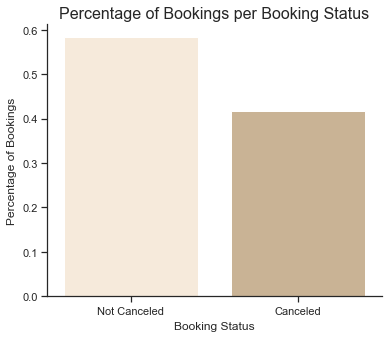

In [12]:
# Visualizing the percentage of cancelled vs not canceled bookings
sns.set()
sns.set_theme(style="ticks", rc=custom_params)

plt.figure(figsize=(6,5)) 
plt.title("Percentage of Bookings per Booking Status", fontsize = 16)
sns.barplot(x=df['IsCanceled'].unique(), y=df['IsCanceled'].value_counts(normalize=True), palette=['antiquewhite', 'tan'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);



In [13]:
df['IsCanceled'].value_counts(normalize=True)

0    0.58273
1    0.41727
Name: IsCanceled, dtype: float64

Text(0.5, 0.98, "Numeric Variables' Box Plots")

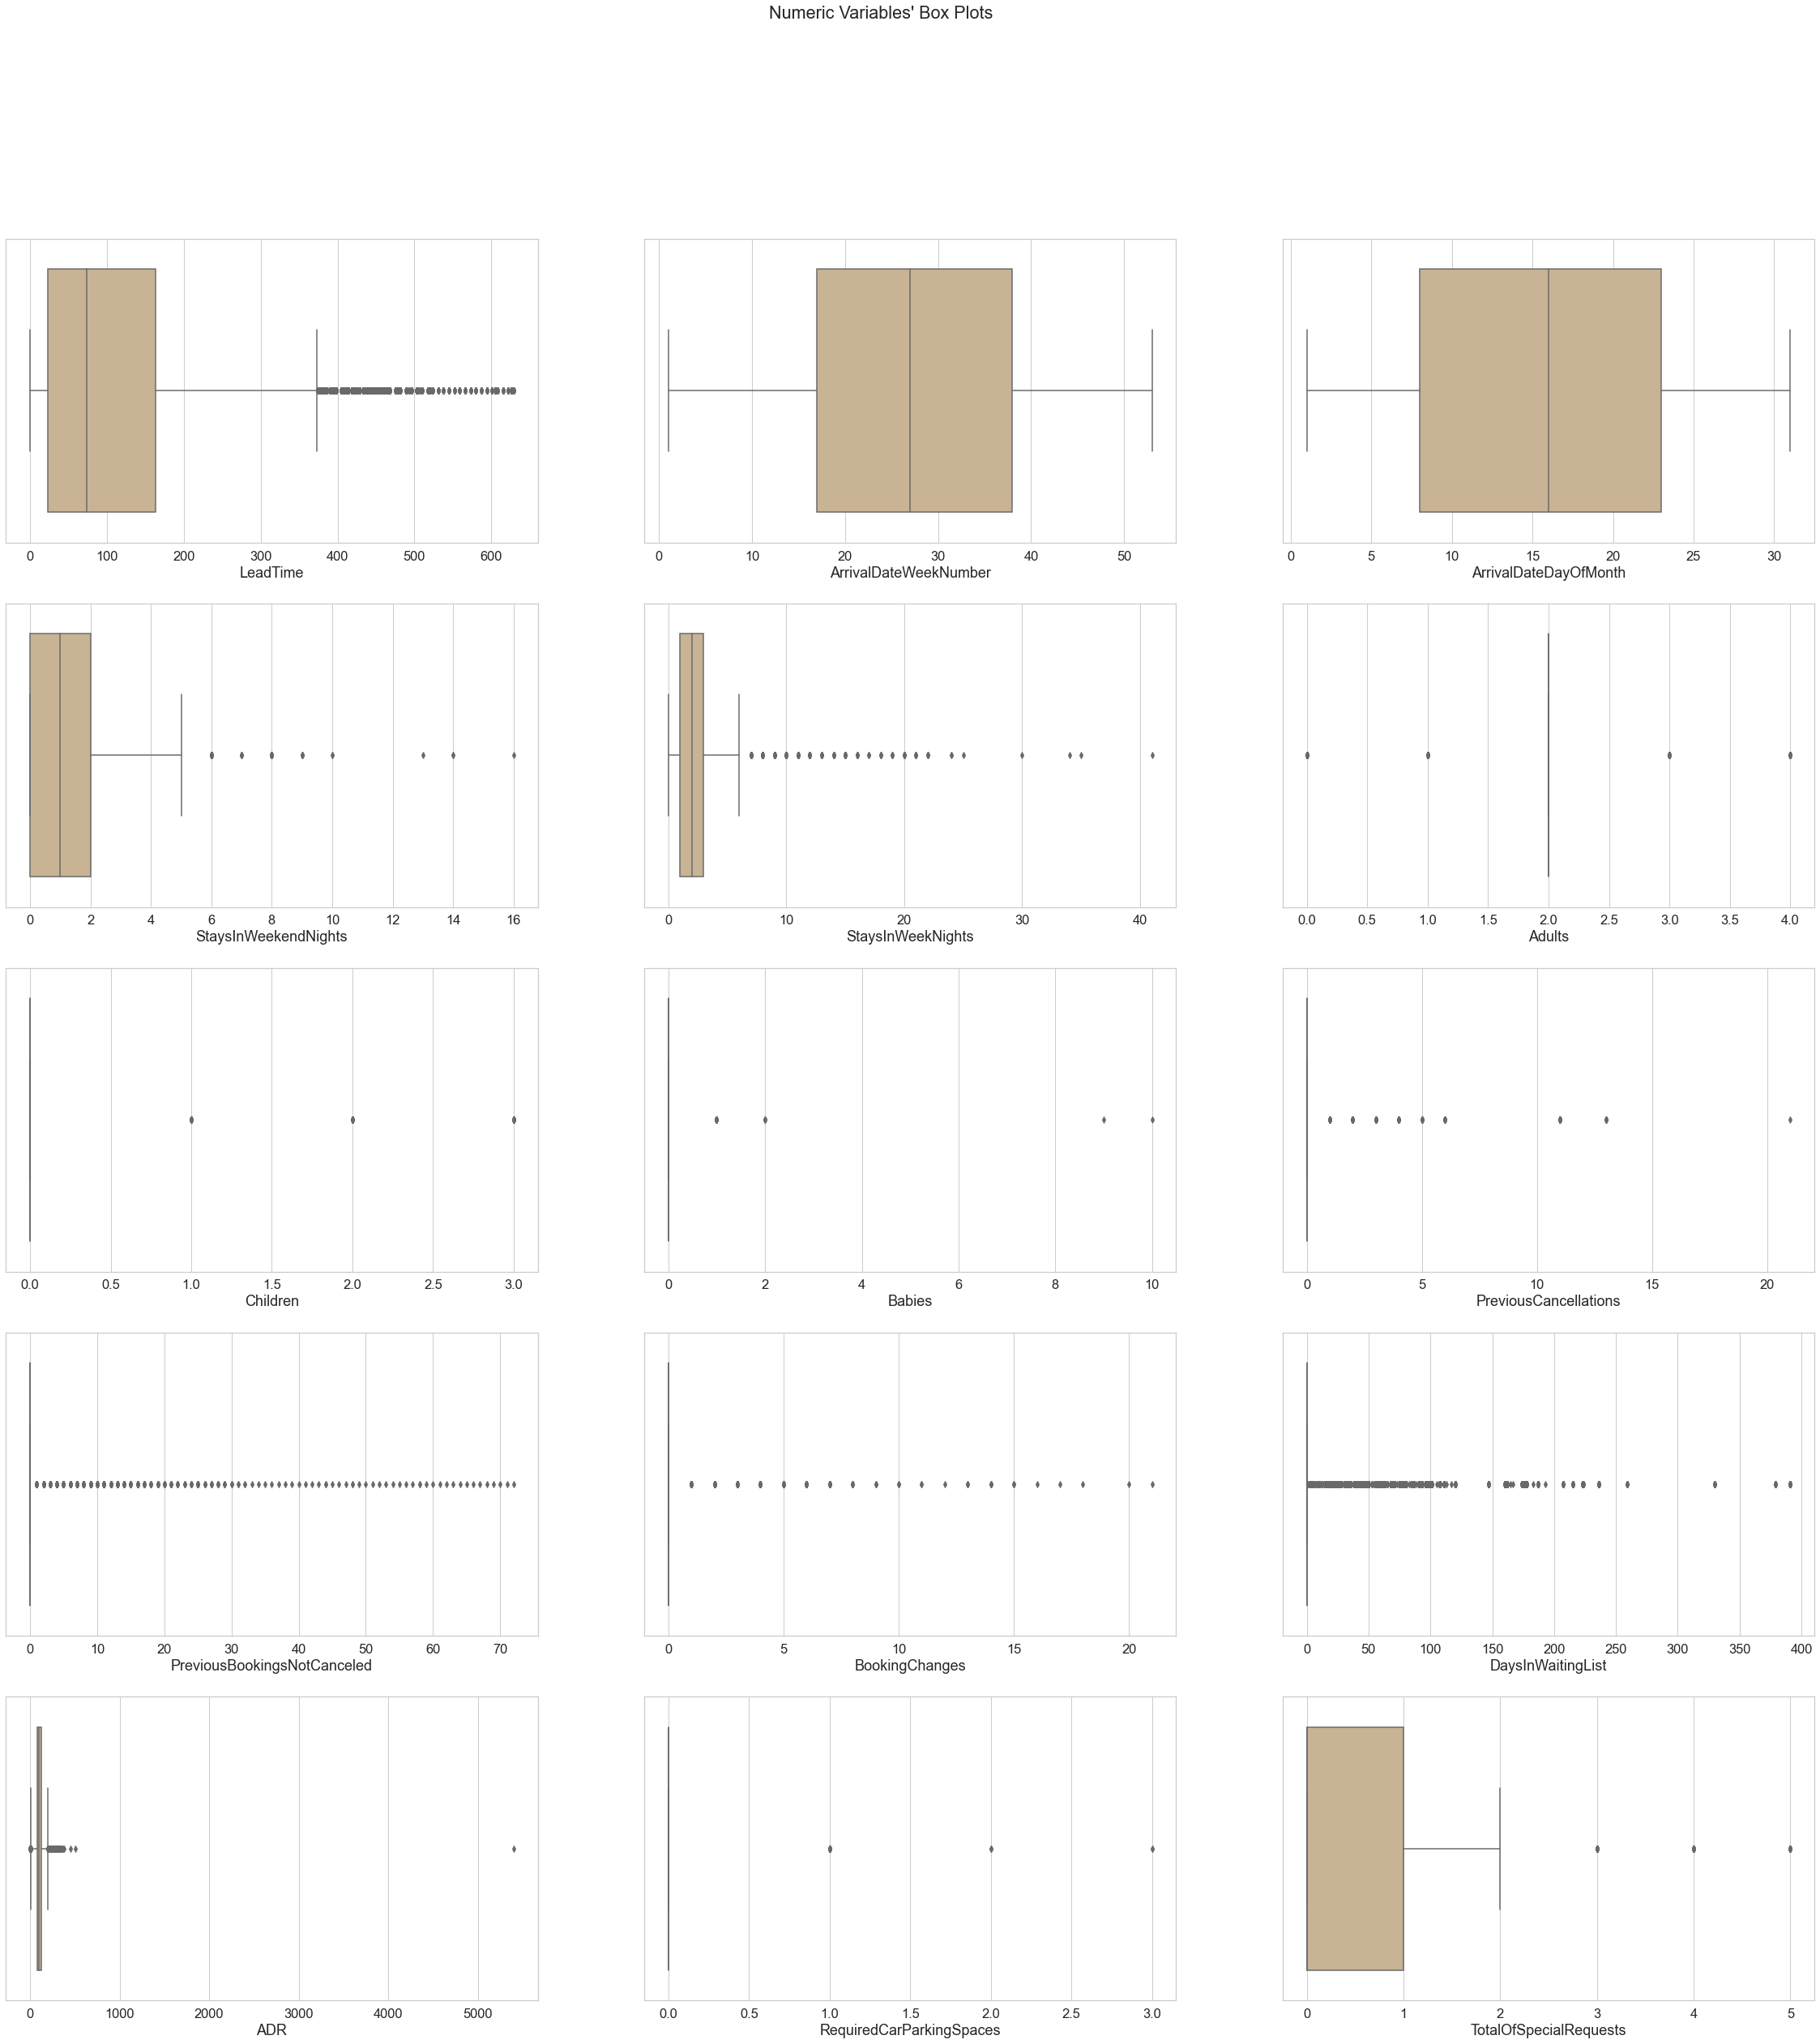

In [14]:
# check the boxplots of metric features
sns.set()
sns.set_theme(style = "whitegrid", font_scale = 1.5)

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(5, ceil(len(metric_features) / 5), figsize=(40, 40))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax, color='tan')
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

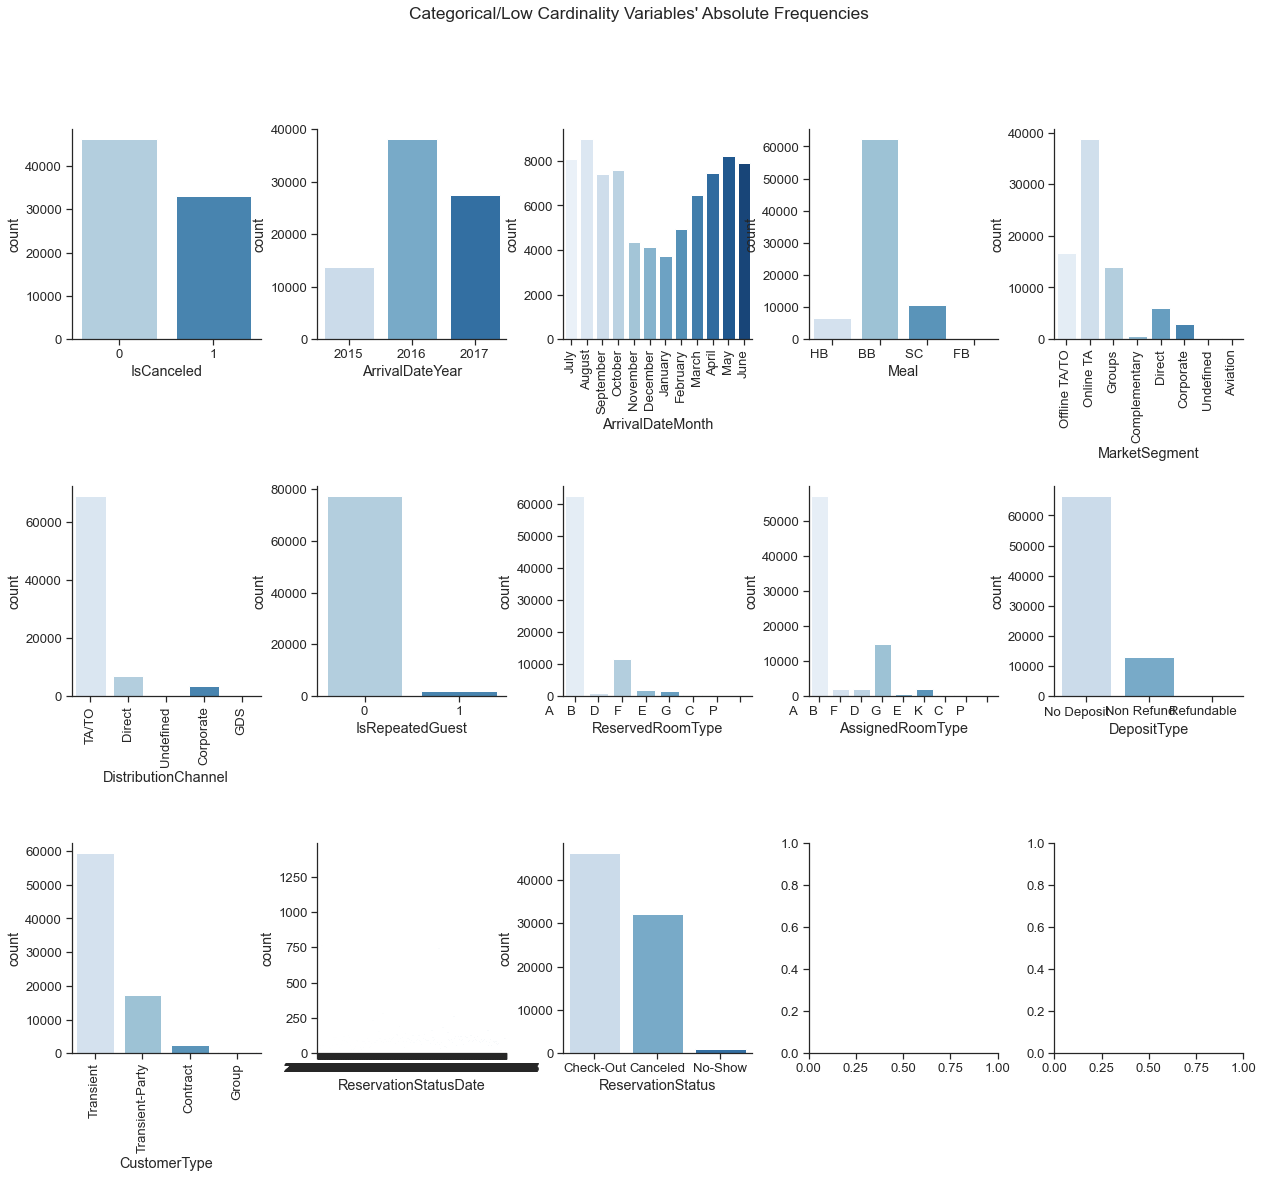

In [15]:
# All Non-Metric/ Low Cardinality Variables' Absolute Frequencies
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)

features = non_metric_features.copy()
features.remove('Country')
features.remove('Company')
features.remove('Agent')
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    sns.countplot(x=df[feat], ax=ax, palette = "Blues")

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)
# Rotating X-axis labels


axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[4].tick_params(axis='x', labelrotation = 90)
axes.flatten()[5].tick_params(axis='x', labelrotation = 90)
axes.flatten()[10].tick_params(axis='x', labelrotation = 90)

plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

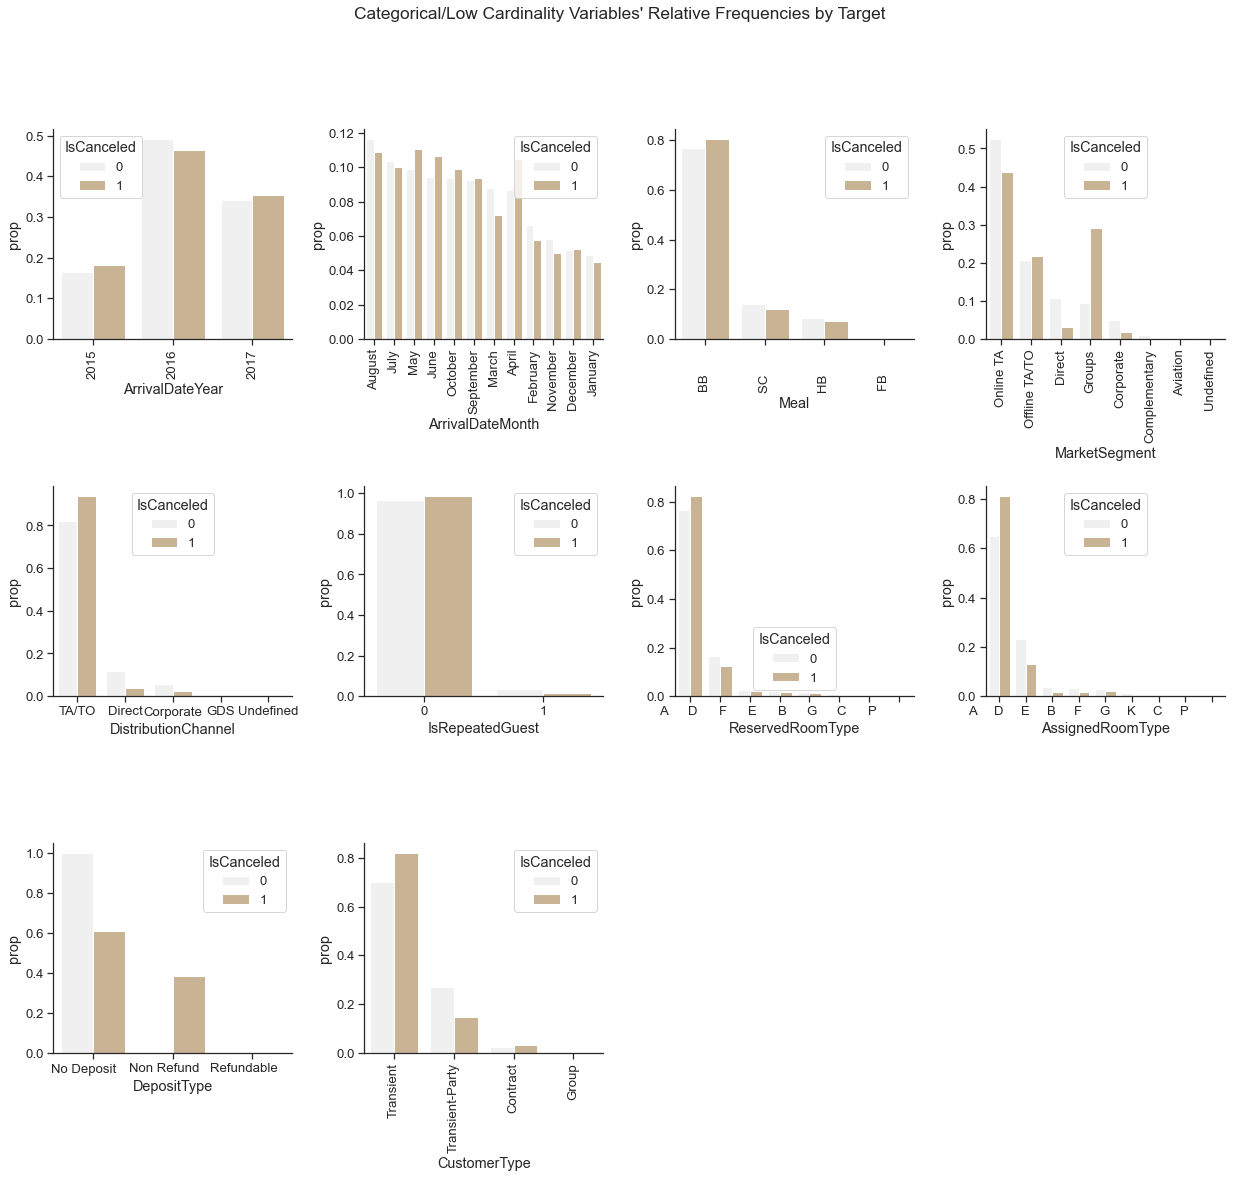

In [16]:
# All Non-Metric/ Low Cardinality Variables' Relative Frequencies by Target
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)

features = non_metric_features.copy()
features.remove('IsCanceled')
features.remove('Country')
features.remove('Company')
features.remove('Agent')
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))
#sns.set(font_scale=3)

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    data = df.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data, x=feat, y='prop', hue='IsCanceled', ax=ax, color = "tan")
    
   
title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-1].remove()
axes.flatten()[-2].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.7)
axes.flatten()[1].tick_params(axis='x', labelrotation = 90)
axes.flatten()[3].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-3].tick_params(axis='x', labelrotation = 90)
plt.show()

In [17]:
#convert month name to month number
def month_to_number(data):
    data_list=[]
    for i in data:
        datetime_object = datetime.datetime.strptime(i, "%B")
        month_number = datetime_object.month
        data_list.append(month_number)
    return data_list

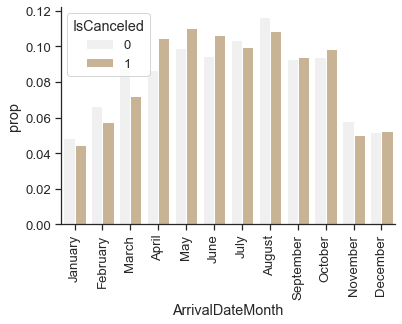

In [18]:
data = df.groupby(['IsCanceled'])['ArrivalDateMonth'].value_counts(normalize=True).rename('prop').reset_index()
data['ArrivalDateMonthN']=month_to_number(data['ArrivalDateMonth'])
data=data.sort_values(by=['ArrivalDateMonthN'])

ax=sns.barplot(data=data, x='ArrivalDateMonth', y='prop', hue='IsCanceled', color = "tan")
plt.xticks(rotation=90)
plt.show()

**plot histograms of metric features before outlier removal**

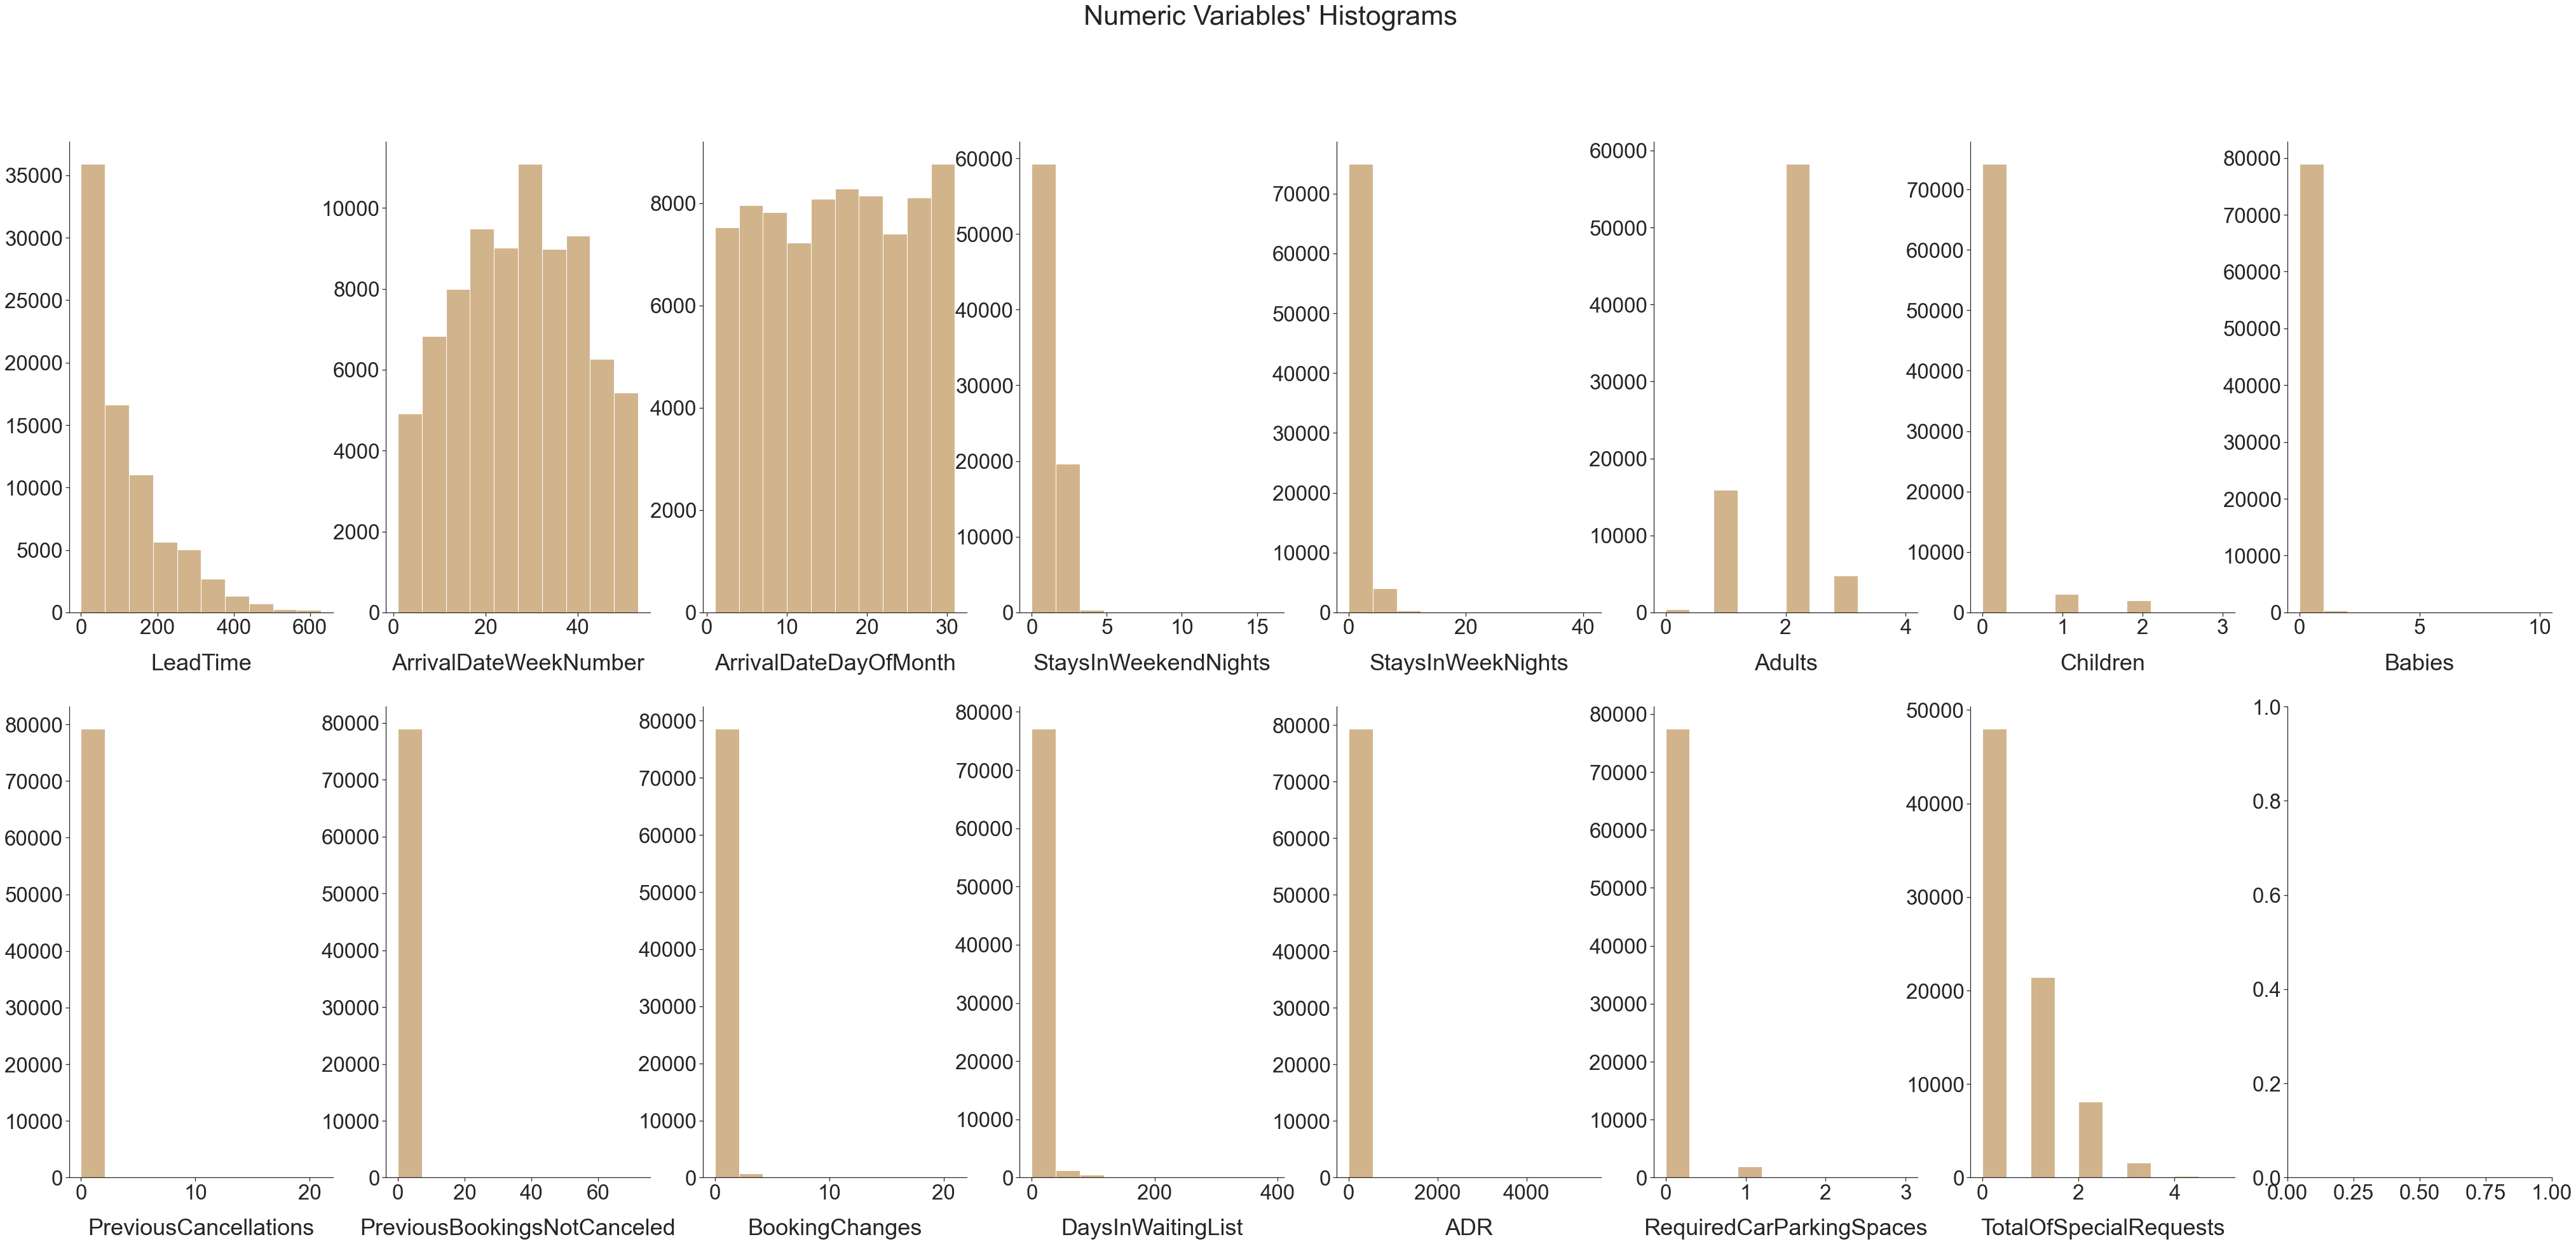

In [19]:
# combine all numerical variables in one figure
# create individual axes where each histogram will be placed
sns.set_theme(style="ticks", rc=custom_params, font_scale = 3)

fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(70, 30))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat], color='tan')
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [20]:
df.describe(include = "all")

IsCanceled      LeadTime  ArrivalDateYear ArrivalDateMonth  \
count   79330.000000  79330.000000     79330.000000            79330   
unique           NaN           NaN              NaN               12   
top              NaN           NaN              NaN           August   
freq             NaN           NaN              NaN             8983   
mean        0.417270    109.735724      2016.174285              NaN   
std         0.493111    110.948526         0.699181              NaN   
min         0.000000      0.000000      2015.000000              NaN   
25%         0.000000     23.000000      2016.000000              NaN   
50%         0.000000     74.000000      2016.000000              NaN   
75%         1.000000    163.000000      2017.000000              NaN   
max         1.000000    629.000000      2017.000000              NaN   

        ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
count            79330.000000           79330.000000          79330.000000   
unique                    NaN                    NaN                   NaN   
top                       NaN                    NaN                   NaN   
freq                      NaN                    NaN                   NaN   
mean                27.177449              15.786625              0.795185   
std                 13.398523               8.728451              0.885026   
min                  1.000000               1.000000              0.000000   
25%                 17.000000               8.000000              0.000000   
50%                 27.000000              16.000000              1.000000   
75%                 38.000000              23.000000              2.000000   
max                 53.000000              31.000000             16.000000   

        StaysInWeekNights        Adults      Children        Babies  \
count        79330.000000  79330.000000  79326.000000  79330.000000   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean             2.182957      1.850977      0.091370      0.004941   
std              1.456416      0.509292      0.372177      0.084323   
min              0.000000      0.000000      0.000000      0.000000   
25%              1.000000      2.000000      0.000000      0.000000   
50%              2.000000      2.000000      0.000000      0.000000   
75%              3.000000      2.000000      0.000000      0.000000   
max             41.000000      4.000000      3.000000     10.000000   

             Meal Country MarketSegment DistributionChannel  IsRepeatedGuest  \
count       79330   79306         79330               79330     79330.000000   
unique          4     166             8                   5              NaN   
top     BB            PRT     Online TA               TA/TO              NaN   
freq        62305   30960         38748               68945              NaN   
mean          NaN     NaN           NaN                 NaN         0.025615   
std           NaN     NaN           NaN                 NaN         0.157983   
min           NaN     NaN           NaN                 NaN         0.000000   
25%           NaN     NaN           NaN                 NaN         0.000000   
50%           NaN     NaN           NaN                 NaN         0.000000   
75%           NaN     NaN           NaN                 NaN         0.000000   
max           NaN     NaN           NaN                 NaN         1.000000   

        PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  \
count            79330.000000                 79330.000000             79330   
unique                    NaN                          NaN                 8   
top                       NaN                          NaN  A                  
freq                      NaN                          NaN             625

In [21]:
metric_features

['LeadTime',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests']

<AxesSubplot:xlabel='LeadTime', ylabel='Density'>

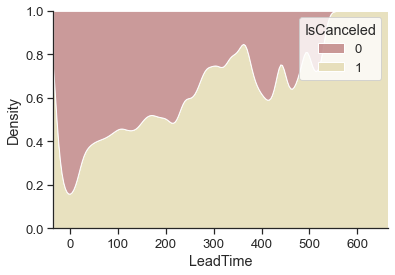

In [22]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="LeadTime", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='ArrivalDateYear', ylabel='Density'>

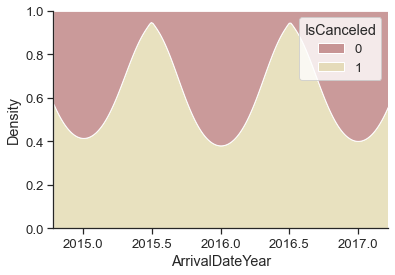

In [23]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="ArrivalDateYear", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='StaysInWeekNights', ylabel='Density'>

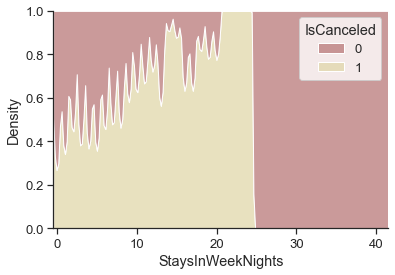

In [24]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="StaysInWeekNights", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='StaysInWeekendNights', ylabel='Density'>

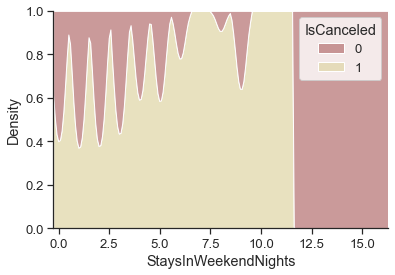

In [25]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="StaysInWeekendNights", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='Adults', ylabel='Density'>

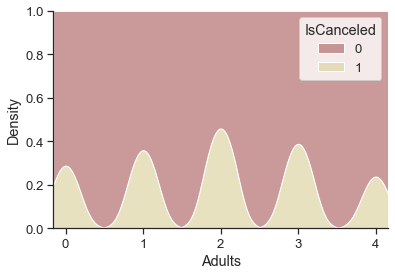

In [26]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="Adults", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='Children', ylabel='Density'>

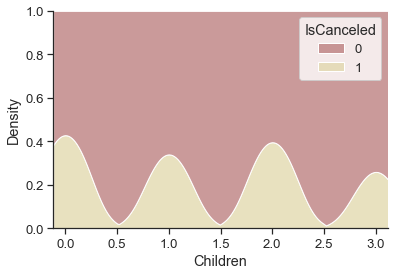

In [27]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="Children", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='Babies', ylabel='Density'>

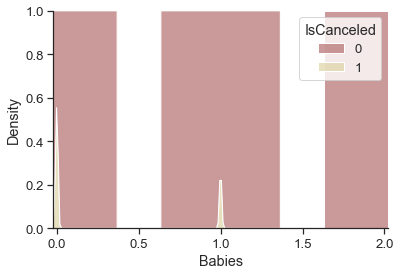

In [28]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df[df['Babies']<8], x="Babies", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='PreviousCancellations', ylabel='Density'>

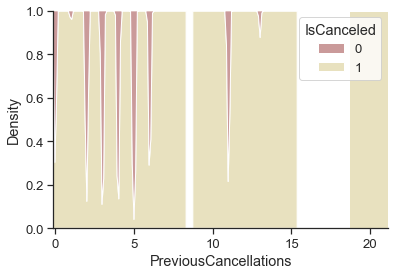

In [29]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="PreviousCancellations", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='PreviousBookingsNotCanceled', ylabel='Density'>

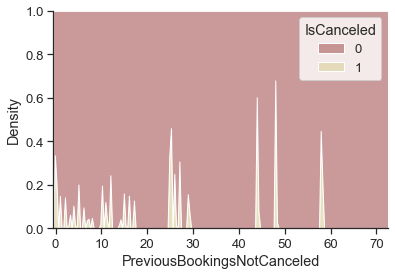

In [30]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="PreviousBookingsNotCanceled", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='BookingChanges', ylabel='Density'>

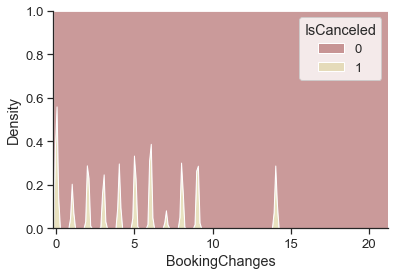

In [31]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="BookingChanges", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='DaysInWaitingList', ylabel='Density'>

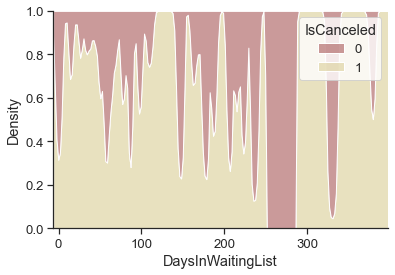

In [32]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="DaysInWaitingList", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='ADR', ylabel='Density'>

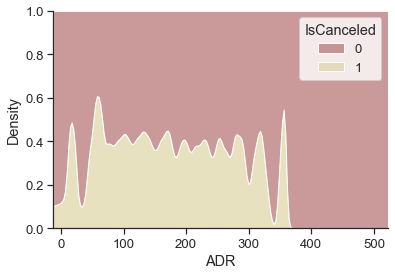

In [33]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df[df['ADR']<1000], x="ADR", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='RequiredCarParkingSpaces', ylabel='Density'>

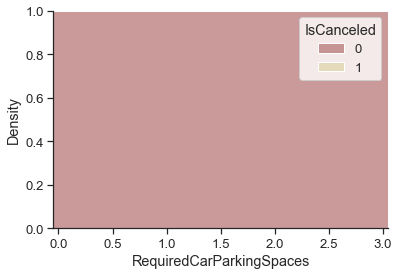

In [34]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="RequiredCarParkingSpaces", hue="IsCanceled", multiple="fill",palette = "pink")

<AxesSubplot:xlabel='TotalOfSpecialRequests', ylabel='Density'>

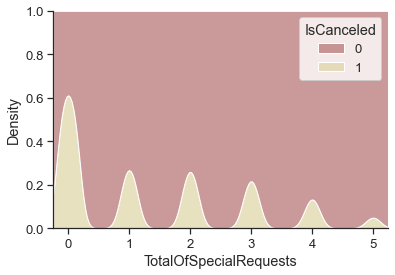

In [35]:
sns.set()
sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params, font_scale = 1.2)
sns.kdeplot(data=df, x="TotalOfSpecialRequests", hue="IsCanceled", multiple="fill",palette = "pink")

**<u>Correlation Matrix</u>**

Pearson's correlation coefficient is used to analyze quantitative data. When the data meets normality, Pearson's correlation coefficient is used to see the relationship between variables.
When the data are quantitative and do not obey normality, Spearman correlation coefficient is used.

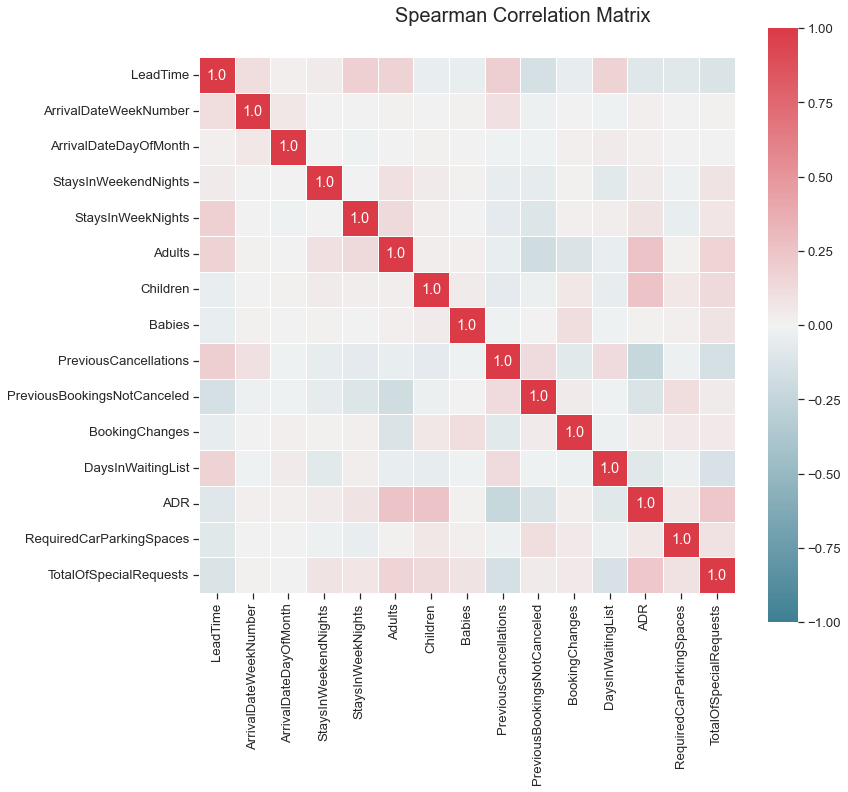

In [36]:
# Prepare figure
fig = plt.figure(figsize=(12, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix", fontsize=20)

plt.show()

#### Build a Customer Distribution Map 

In [37]:
df_map = pd.pivot_table(df, values=['IsCanceled', 'CustomerType','ArrivalDateMonth','IsRepeatedGuest'], 
                        index=['Country'],
                        aggfunc={'IsCanceled': ['count',lambda x: round(x.sum()/x.count(),2)],
                                 'CustomerType': lambda x: x.mode().iat[0],
                                 'ArrivalDateMonth': lambda x: x.mode().iat[0],
                                 'IsRepeatedGuest': np.sum,
                                }).reset_index()
df_map.columns =(['Country', 'ArrivalDateMonth','CustomerType','CancelRates','Counts','RepeatedCounts'])
df_map.nlargest(10,columns='Counts')

Country ArrivalDateMonth CustomerType  CancelRates   Counts  \
125     PRT        September    Transient         0.65  30960.0   
50      FRA           August    Transient         0.20   8804.0   
39      DEU           August    Transient         0.18   6084.0   
53      GBR             July    Transient         0.29   5315.0   
46      ESP           August    Transient         0.29   4611.0   
75      ITA           August    Transient         0.38   3307.0   
14      BEL             July    Transient         0.22   1894.0   
23      BRA         December    Transient         0.41   1794.0   
158     USA             June    Transient         0.27   1618.0   
115     NLD           August    Transient         0.21   1590.0   

     RepeatedCounts  
125            1756  
50               62  
39               19  
53               15  
46               53  
75               18  
14               10  
23                7  
158              12  
115               5

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.6, 0.4],
    specs=[[{"type": "choropleth", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "bar"}]])
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
# Add scattergeo globe map of volcano locations
fig.add_trace(
        go.Choropleth(
        locations=df_map.Country,
        z = df_map.Counts, 
        colorbar_title = "Clients number",
        reversescale = True 
    ),
    row=1, col=1
)

# Add locations bar chart
fig.add_trace(
    go.Bar(x=df_map.sort_values('Counts',ascending=False)['Country'][0:10],
           y=df_map.sort_values('Counts',ascending=False)['Counts'][0:10], 
           marker=dict(color="tan"),  
           text=df_map.sort_values('Counts',ascending=False)['Counts'],
           showlegend=False),
    row=1, col=2
)

# Add 3d surface of volcano
fig.add_trace(
    go.Bar(x=df_map.sort_values('Counts',ascending=False)['Country'][0:10],
           y=df_map.sort_values('Counts',ascending=False)['CancelRates'][0:10], 
           marker=dict(color="darkred"), 
           text=df_map.sort_values('Counts',ascending=False)['CancelRates'],
           showlegend=False),
    row=2, col=2
)

# Update geo subplot properties
fig.update_geos(
    landcolor="White ",
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(
    template="seaborn",
    margin=dict(r=10, t=25, b=40, l=60),
)

fig.update_layout(
    title={
        'text': "Customer Distribution Map - Top 10 countries counts and cancellation rate",
        'xanchor': 'center',
        'yanchor': 'top'})


fig.show()


### Verify data quality 

In [39]:
#show records with unsupervised babies
df[(df['Babies'] != 0)
                  & (df['Adults'] == 0)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
6090            0         6             2015         December   
41315           1        22             2015         December   
50730           0        14             2016             June   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
6090                      51                     18                     0   
41315                     50                      9                     1   
50730                     24                      9                     0   

       StaysInWeekNights  Adults  Children  Babies       Meal Country  \
6090                   1       0       2.0       1  BB            PRT   
41315                  4       0       2.0       1  BB            PRT   
50730                  3       0       2.0       1  BB            ITA   

      MarketSegment DistributionChannel  IsRepeatedGuest  \
6090      Online TA               TA/TO                0   
41315        Direct              Direct                0   
50730     Online TA               TA/TO                0   

       PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  \
6090                       0                            0  B                  
41315                      0                            0  B                  
50730                      0                            0  B                  

       AssignedRoomType  BookingChanges      DepositType        Agent  \
6090   B                              0  No Deposit                 9   
41315  B                              1  No Deposit                14   
50730  B                              2  No Deposit                 9   

           Company  DaysInWaitingList     CustomerType     ADR  \
6090          NULL                  0  Transient-Party   77.00   
41315         NULL                  0        Transient   80.75   
50730         NULL                  0        Transient  116.49   

       RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
6090                          0                       2         Check-Out   
41315                         0                       1           No-Show   
50730                         0                       2         Check-Out   

      ReservationStatusDate  
6090             2015-12-19  
41315            2015-12-09  
50730            2016-06-12

In [40]:
#show records with children not accompanied by parents and not belonging to a different transient booking
df[(df['Children'] != 0) 
                  & (df['Adults'] == 0)
                & (df['CustomerType'] != "Transient-Party")]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
1892            0        15             2015           August   
6586            0        40             2016          January   
6588            0        40             2016          January   
6595            0        40             2016          January   
6986            1        43             2016         February   
...           ...       ...              ...              ...   
77070           0       329             2017             July   
77144           0       296             2017             July   
77214           0       276             2017             July   
77243           0       291             2017             July   
77393           0       159             2017             July   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
1892                      35                     28                     0   
6586                       3                     14                     0   
6588                       3                     14                     0   
6595                       3                     14                     0   
6986                       6                      5                     1   
...                      ...                    ...                   ...   
77070                     30                     24                     1   
77144                     30                     27                     1   
77214                     31                     30                     2   
77243                     30                     29                     2   
77393                     31                     31                     1   

       StaysInWeekNights  Adults  Children  Babies       Meal Country  \
1892                   1       0       2.0       0  BB            PRT   
6586                   3       0       2.0       0  BB            ESP   
6588                   3       0       2.0       0  BB            ESP   
6595                   3       0       2.0       0  BB            ESP   
6986                   2       0       2.0       0  BB            BEL   
...                  ...     ...       ...     ...        ...     ...   
77070                  5       0       2.0       0  BB            GBR   
77144                  3       0       2.0       0  BB            GBR   
77214                  1       0       2.0       0  BB            DEU   
77243                  2       0       2.0       0  BB            PRT   
77393                  3       0       2.0       0  SC            FRA   

       MarketSegment DistributionChannel  IsRepeatedGuest  \
1892   Complementary              Direct                0   
6586       Online TA               TA/TO                0   
6588       Online TA               TA/TO                0   
6595       Online TA               TA/TO                0   
6986       Online TA               TA/TO                0   
...              ...                 ...              ...   
77070      Online TA               TA/TO                0   
77144      Online TA               TA/TO                0   
77214      Online TA               TA/TO                0   
77243      Online TA               TA/TO                0   
77393      Online TA               TA/TO                0   

       PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  \
1892                       0                            0  B                  
6586                       0                            0  B                  
6588                       0                            0  B                  
6595                       0                            0  B                  
6986                       0                            0  B                  
...                      ...                          ...               ...   
77070                      0                            0  B                  
77144                      0                            0  

In [41]:
#show records where there are no guests registered (adults, children or babies)
df[(df['Adults'] == 0) 
                & (df['Children'] == 0)
                & (df['Babies'] == 0)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
332             0       132             2015             July   
862             0         0             2015           August   
960             0         0             2015           August   
996             0         0             2015           August   
2392            1         1             2015        September   
...           ...       ...              ...              ...   
74969           0       107             2017             June   
75031           0         1             2017             June   
76191           0        44             2017             July   
76474           0         2             2017             July   
77027           0       170             2017             July   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
332                       30                     23                     2   
862                       33                      9                     2   
960                       33                     10                     9   
996                       33                     11                     0   
2392                      37                      6                     2   
...                      ...                    ...                   ...   
74969                     26                     27                     0   
75031                     26                     30                     0   
76191                     28                     15                     1   
76474                     28                     15                     2   
77027                     30                     27                     0   

       StaysInWeekNights  Adults  Children  Babies       Meal Country  \
332                    5       0       0.0       0  HB            PRT   
862                    0       0       0.0       0  BB            FRA   
960                   20       0       0.0       0  SC            PRT   
996                    4       0       0.0       0  BB            PRT   
2392                   0       0       0.0       0  SC            PRT   
...                  ...     ...       ...     ...        ...     ...   
74969                  3       0       0.0       0  BB            CHE   
75031                  1       0       0.0       0  SC            PRT   
76191                  1       0       0.0       0  SC            SWE   
76474                  5       0       0.0       0  SC            RUS   
77027                  2       0       0.0       0  BB            BRA   

       MarketSegment DistributionChannel  IsRepeatedGuest  \
332           Groups               TA/TO                0   
862        Online TA               TA/TO                0   
960        Online TA              Direct                0   
996        Online TA              Direct                0   
2392          Groups               TA/TO                0   
...              ...                 ...              ...   
74969      Online TA               TA/TO                0   
75031  Complementary              Direct                0   
76191      Online TA               TA/TO                0   
76474      Online TA               TA/TO                0   
77027  Offline TA/TO               TA/TO                0   

       PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  \
332                        0                            0  A                  
862                        0                            0  F                  
960                        0                            0  E                  
996                        0                            0  A                  
2392                       0                            0  A                  
...                      ...                          ...               ...   
74969                      0                            0  A                  
75031                      0                            0  

In [42]:
#show records of repeated guest that neither have records in previous cancellation nor previous bookings not canceled
df[((df['IsRepeatedGuest']==1)
                    & (df['PreviousCancellations']==0)
                    & (df['PreviousBookingsNotCanceled']==0))]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
36264           0         0             2015             July   
36943           0         0             2015           August   
36944           0         0             2015           August   
37110           0         0             2015        September   
37118           1         0             2015        September   
...           ...       ...              ...              ...   
77235           1         0             2017           August   
77641           0         0             2017           August   
77901           0         0             2017           August   
77969           0         0             2017           August   
79010           0         0             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
36264                     29                     16                     0   
36943                     35                     27                     0   
36944                     35                     27                     0   
37110                     37                      9                     0   
37118                     37                     10                     0   
...                      ...                    ...                   ...   
77235                     31                      2                     0   
77641                     32                      8                     0   
77901                     32                     12                     0   
77969                     33                     14                     0   
79010                     35                     29                     0   

       StaysInWeekNights  Adults  Children  Babies       Meal Country  \
36264                  0       2       0.0       0  SC            PRT   
36943                  1       0       0.0       0  BB            PRT   
36944                  1       2       2.0       0  BB            PRT   
37110                  0       1       0.0       0  BB            PRT   
37118                  1       2       0.0       0  BB            PRT   
...                  ...     ...       ...     ...        ...     ...   
77235                  2       1       0.0       0  BB            PRT   
77641                  0       2       0.0       0  BB            PRT   
77901                  1       2       0.0       0  HB            FRA   
77969                  0       2       0.0       0  BB            PRT   
79010                  1       2       3.0       0  BB            GBR   

       MarketSegment DistributionChannel  IsRepeatedGuest  \
36264  Offline TA/TO               TA/TO                1   
36943      Online TA              Direct                1   
36944      Online TA              Direct                1   
37110      Corporate           Corporate                1   
37118      Corporate              Direct                1   
...              ...                 ...              ...   
77235      Corporate           Corporate                1   
77641  Offline TA/TO               TA/TO                1   
77901         Direct              Direct                1   
77969         Direct              Direct                1   
79010  Offline TA/TO               TA/TO                1   

       PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  \
36264                      0                            0  A                  
36943                      0                            0  F                  
36944                      0                            0  F                  
37110                      0                            0  A                  
37118                      0                            0  A                  
...                      ...                          ...               ...   
77235                      0                            0  A                  
77641                      0                            0  

In [43]:
#show records that dont include any stays per week/weekend
df[(df['StaysInWeekendNights'] == 0) 
                & (df['StaysInWeekNights'] == 0)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
473             0         0             2015             July   
474             0         0             2015             July   
961             0         0             2015           August   
1079            0         0             2015           August   
1964            0         0             2015           August   
...           ...       ...              ...              ...   
75423           0        15             2017             July   
77641           0         0             2017           August   
77969           0         0             2017           August   
78571           0        78             2017           August   
78903           0         1             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
473                       31                     28                     0   
474                       31                     28                     0   
961                       33                     11                     0   
1079                      33                     13                     0   
1964                      36                     30                     0   
...                      ...                    ...                   ...   
75423                     27                      6                     0   
77641                     32                      8                     0   
77969                     33                     14                     0   
78571                     34                     23                     0   
78903                     35                     27                     0   

       StaysInWeekNights  Adults  Children  Babies       Meal Country  \
473                    0       2       0.0       0  BB            PRT   
474                    0       2       0.0       0  BB            PRT   
961                    0       2       0.0       0  BB            PRT   
1079                   0       2       0.0       0  BB            PRT   
1964                   0       1       0.0       0  BB            PRT   
...                  ...     ...       ...     ...        ...     ...   
75423                  0       1       0.0       0  SC            FRA   
77641                  0       2       0.0       0  BB            PRT   
77969                  0       2       0.0       0  BB            PRT   
78571                  0       1       0.0       0  BB            PRT   
78903                  0       2       0.0       0  BB            PRT   

       MarketSegment DistributionChannel  IsRepeatedGuest  \
473           Direct              Direct                0   
474           Direct              Direct                0   
961           Direct              Direct                0   
1079       Online TA               TA/TO                0   
1964          Direct              Direct                0   
...              ...                 ...              ...   
75423         Direct              Direct                0   
77641  Offline TA/TO               TA/TO                1   
77969         Direct              Direct                1   
78571  Offline TA/TO               TA/TO                0   
78903         Direct              Direct                0   

       PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  \
473                        0                            0  A                  
474                        0                            0  A                  
961                        0                            0  A                  
1079                       0                            0  A                  
1964                       0                            0  A                  
...                      ...                          ...               ...   
75423                      0                            0  A                  
77641                      0                            0  

In [44]:
#show records with leadtime exceeding Interquartile range days
LeadTimeQ1 = df['LeadTime'].quantile(0.25)
LeadTimeQ3 = df['LeadTime'].quantile(0.75)
LeadTimeIQR =LeadTimeQ3 - LeadTimeQ1
df[(df['LeadTime'] > (LeadTimeQ3+1.5*LeadTimeIQR))] 

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
8174            1       393             2016            March   
8175            1       393             2016            March   
8176            1       393             2016            March   
8177            1       393             2016            March   
8180            1       393             2016            March   
...           ...       ...              ...              ...   
79042           0       518             2017           August   
79047           0       518             2017           August   
79049           0       518             2017           August   
79051           0       518             2017           August   
79088           0       457             2017           August   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
8174                      12                     19                     2   
8175                      12                     19                     2   
8176                      12                     19                     2   
8177                      12                     19                     2   
8180                      12                     19                     2   
...                      ...                    ...                   ...   
79042                     34                     26                     2   
79047                     34                     26                     2   
79049                     34                     26                     2   
79051                     34                     26                     2   
79088                     34                     25                     2   

       StaysInWeekNights  Adults  Children  Babies       Meal Country  \
8174                   1       2       0.0       0  BB            PRT   
8175                   1       2       0.0       0  BB            PRT   
8176                   1       2       0.0       0  BB            PRT   
8177                   1       2       0.0       0  BB            PRT   
8180                   1       2       0.0       0  BB            PRT   
...                  ...     ...       ...     ...        ...     ...   
79042                  1       1       0.0       0  BB            PRT   
79047                  1       2       0.0       0  BB            AUS   
79049                  1       2       0.0       0  BB            GBR   
79051                  1       2       0.0       0  BB            GBR   
79088                  3       2       0.0       0  HB            DEU   

       MarketSegment DistributionChannel  IsRepeatedGuest  \
8174          Groups               TA/TO                0   
8175          Groups               TA/TO                0   
8176          Groups               TA/TO                0   
8177          Groups               TA/TO                0   
8180          Groups               TA/TO                0   
...              ...                 ...              ...   
79042         Groups               TA/TO                0   
79047         Groups               TA/TO                0   
79049         Groups               TA/TO                0   
79051         Groups               TA/TO                0   
79088  Offline TA/TO               TA/TO                0   

       PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  \
8174                       0                            0  A                  
8175                       0                            0  A                  
8176                       0                            0  A                  
8177                       0                            0  A                  
8180                       0                            0  A                  
...                      ...                          ...               ...   
79042                      0                            0  A                  
79047                      0                            0  

#### <u>Observations</u>

## Data Preparation

### Select data

In [45]:
# Preserving the original df
df_clean = df.copy()

In [46]:
# Drop Duplicates and reset index
#df_clean = df_clean.drop_duplicates(subset=df_clean.columns, keep='first').reset_index(drop=True)
df_clean.drop_duplicates(inplace=True)

In [47]:
# drop the variables that are relevant for the predictive model
df_clean=df_clean.drop(columns=['DistributionChannel','ReservationStatus','ReservationStatusDate'])

### Clean data

In [48]:
# fill the missing value with most frequent value (CHildren = null, Country = Portugal)
df_clean['Children']=df_clean['Children'].fillna(0)
df_clean['Country'] = df_clean['Country'].fillna(df_clean['Country'].value_counts().index[0])

In [49]:
# Trimming of Outliers
df_clean = df_clean[(df_clean['Babies'] < 8)] 

df_clean = df_clean[(df_clean['ADR'] < 1000)]

df_clean = df_clean[~((df_clean['Adults'] == 0) 
                & (df_clean['Babies'] != 0))]

df_clean = df_clean[~((df_clean['Adults'] == 0) 
                & (df_clean['Children'] != 0)
                & (df_clean['CustomerType'] != "Transient-Party"))] 

df_clean = df_clean[~((df_clean['Adults'] == 0) 
                & (df_clean['Children'] == 0)
                & (df_clean['Babies'] == 0))]
    
df_clean = df_clean[~((df_clean['IsRepeatedGuest']==1)
                    & (df_clean['PreviousCancellations']==0)
                    & (df_clean['PreviousBookingsNotCanceled']==0))]

df_clean = df_clean[~(df_clean['LeadTime'] > (LeadTimeQ3+3*LeadTimeIQR))] 

### Construct data

In [50]:
# create new variables
df_clean['TotalStayNights']=df_clean['StaysInWeekendNights'] + df_clean['StaysInWeekNights']
df_clean['TotalGuestsNumber']=df_clean['Adults'] + df_clean['Children'] + df_clean['Babies']
df_clean['ReservedRoomChanged']=(df_clean['ReservedRoomType']==df_clean['AssignedRoomType']).astype(int)
df_clean['TotalPreviousCancellationsRate']=(df_clean['PreviousCancellations'] / (df_clean['PreviousCancellations'] + df_clean['PreviousBookingsNotCanceled'])).fillna(0)

In [51]:
#convert month name to month number
df_clean['ArrivalDateMonth']=month_to_number(df_clean['ArrivalDateMonth'])

In [52]:
#create binary variable for the clients who only stay in the weekend
df_clean['WeekendOnly']=((df_clean['StaysInWeekNights']==0) & (df_clean['StaysInWeekendNights']>0)).astype(int)

In [53]:
#create binary variable for dependents
df_clean['Dependents'] = np.where((df_clean['Children'] > 0) 
        | (df_clean['Babies'] > 0), 1, 0)

In [54]:
#create binary variable for RequiresParking
df_clean['RequiresParking'] = np.where((df_clean['RequiredCarParkingSpaces'] > 0) , 1, 0)

In [55]:
#create customer groups: single, couple, chil, family
df_clean['CustomerGroup'] = np.where((df_clean['Adults'] == 1) & (df_clean['Dependents'] == 0), 'Single', 
         (np.where((df_clean['Adults'] == 2) & (df_clean['Dependents'] == 0), 'Couple', 'Family')))

In [56]:
df_clean.groupby(df_clean['CustomerGroup']).count()

IsCanceled  LeadTime  ArrivalDateYear  ArrivalDateMonth  \
CustomerGroup                                                            
Couple              33296     33296            33296             33296   
Family               9523      9523             9523              9523   
Single              10108     10108            10108             10108   

               ArrivalDateWeekNumber  ArrivalDateDayOfMonth  \
CustomerGroup                                                 
Couple                         33296                  33296   
Family                          9523                   9523   
Single                         10108                  10108   

               StaysInWeekendNights  StaysInWeekNights  Adults  Children  \
CustomerGroup                                                              
Couple                        33296              33296   33296     33296   
Family                         9523               9523    9523      9523   
Single                        10108              10108   10108     10108   

               Babies   Meal  Country  MarketSegment  IsRepeatedGuest  \
CustomerGroup                                                           
Couple          33296  33296    33296          33296            33296   
Family           9523   9523     9523           9523             9523   
Single          10108  10108    10108          10108            10108   

               PreviousCancellations  PreviousBookingsNotCanceled  \
CustomerGroup                                                       
Couple                         33296                        33296   
Family                          9523                         9523   
Single                         10108                        10108   

               ReservedRoomType  AssignedRoomType  BookingChanges  \
CustomerGroup                                                       
Couple                    33296             33296           33296   
Family                     9523              9523            9523   
Single                    10108             10108           10108   

               DepositType  Agent  Company  DaysInWaitingList  CustomerType  \
CustomerGroup                                                                 
Couple               33296  33296    33296              33296         33296   
Family                9523   9523     9523               9523          9523   
Single               10108  10108    10108              10108         10108   

                 ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests  \
CustomerGroup                                                            
Couple         33296                     33296                   33296   
Family          9523                      9523                    9523   
Single         10108                     10108                   10108   

               TotalStayNights  TotalGuestsNumber  ReservedRoomChanged  \
CustomerGroup                                                            
Couple                   33296              33296                33296   
Family                    9523               9523                 9523   
Single                   10108              10108                10108   

               TotalPreviousCancellationsRate  WeekendOnly  Dependents  \
CustomerGroup                                                            
Couple                                  33296        33296       33296   
Family                                   9523         9523        9523   
Single                                  10108        10108       10108   

               RequiresParking  
CustomerGroup                   
Couple                   33296  
Family                    9523  
Single                   10108

In [57]:
#group by customer group
df_clean.groupby(df_clean['CustomerGroup']).mean()['TotalPreviousCancellationsRate']

CustomerGroup
Couple    0.016599
Family    0.005148
Single    0.024451
Name: TotalPreviousCancellationsRate, dtype: float64

In [58]:
#create binary variable for Portuguese / Non-Portuguese customers
df_clean['Portuguese'] = np.where((df_clean['Country'] == "PRT") , 1, 0)

In [59]:
# drop the variables that are not relevant or represented by new features 
df_clean=df_clean.drop(columns=['ArrivalDateYear', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Country', 'ReservedRoomType', 'AssignedRoomType', 'RequiredCarParkingSpaces'])

In [60]:
#reset index 
df_clean.reset_index(drop = True)
df_clean

IsCanceled  LeadTime  ArrivalDateMonth  ArrivalDateWeekNumber  \
0               0         6                 7                     27   
1               1        88                 7                     27   
2               1        65                 7                     27   
3               1        92                 7                     27   
4               1       100                 7                     27   
...           ...       ...               ...                    ...   
79325           0        23                 8                     35   
79326           0       102                 8                     35   
79327           0        34                 8                     35   
79328           0       109                 8                     35   
79329           0       205                 8                     35   

       ArrivalDateDayOfMonth       Meal  MarketSegment  IsRepeatedGuest  \
0                          1  HB         Offline TA/TO                0   
1                          1  BB             Online TA                0   
2                          1  BB             Online TA                0   
3                          1  BB             Online TA                0   
4                          2  BB             Online TA                0   
...                      ...        ...            ...              ...   
79325                     30  BB         Offline TA/TO                0   
79326                     31  BB             Online TA                0   
79327                     31  BB             Online TA                0   
79328                     31  BB             Online TA                0   
79329                     29  HB             Online TA                0   

       PreviousCancellations  PreviousBookingsNotCanceled  BookingChanges  \
0                          0                            0               0   
1                          0                            0               0   
2                          0                            0               0   
3                          0                            0               0   
4                          0                            0               0   
...                      ...                          ...             ...   
79325                      0                            0               0   
79326                      0                            0               0   
79327                      0                            0               0   
79328                      0                            0               0   
79329                      0                            0               0   

           DepositType        Agent      Company  DaysInWaitingList  \
0      No Deposit                 6         NULL                  0   
1      No Deposit                 9         NULL                  0   
2      No Deposit                 9         NULL                  0   
3      No Deposit                 9         NULL                  0   
4      No Deposit                 9         NULL                  0   
...                ...          ...          ...                ...   
79325  No Deposit               394         NULL                  0   
79326  No Deposit                 9         NULL                  0   
79327  No Deposit                 9         NULL                  0   
79328  No Deposit                89         NULL                  0   
79329  No Deposit                 9         NULL                  0   

      CustomerType     ADR  TotalOfSpecialRequests  TotalStayNights  \
0        Transient    0.00                       0                2   
1        Transient   76.50                       1                4   
2        Transient   68.00                       1                4   
3        Transient   76.50                       2                6   
4        Transient   76.50                       1                2   
...            ...     ...           

In [61]:
#redefine metric_features non-metric features
non_metric_features = ['IsCanceled', 'Meal', 'MarketSegment', 'IsRepeatedGuest','DepositType', 'Agent', 
       'Company','CustomerType', 'ReservedRoomChanged', 'WeekendOnly',
       'Dependents', 'RequiresParking', 'CustomerGroup', 'Portuguese' ]
metric_features = df_clean.columns.drop(non_metric_features).to_list()

### Data Normalization

**<u>Robust Scaler</u>**
- If your data has many outliers, then using the mean and variance of the data to do normalization will not work.
- Using RobustScaler will de-center the data based on the median or quartiles.

In [62]:
#create copy of dataset
dfn=df_clean.copy()

#transform the numerical data
dfn_num = dfn[metric_features]
scaler =RobustScaler().fit(dfn_num)
dfn_num_scaled = scaler.transform(dfn_num) # this will return an array

# Convert the array to a pandas dataframe
dfn_num_scaled = pd.DataFrame(dfn_num_scaled, columns = dfn_num.columns).set_index(dfn.index)
dfn= dfn_num_scaled.join(dfn[non_metric_features]).set_index(dfn.index)

In [63]:
dfn.head(15)

LeadTime  ArrivalDateMonth  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  \
0  -0.432692               0.2                    0.0              -1.000000   
1   0.355769               0.2                    0.0              -1.000000   
2   0.134615               0.2                    0.0              -1.000000   
3   0.394231               0.2                    0.0              -1.000000   
4   0.471154               0.2                    0.0              -0.933333   
5   0.269231               0.2                    0.0              -0.933333   
6  -0.461538               0.2                    0.0              -0.933333   
7   0.115385               0.2                    0.0              -0.933333   
8   0.105769               0.2                    0.0              -0.933333   
10 -0.076923               0.2                    0.0              -0.866667   
11 -0.076923               0.2                    0.0              -0.866667   
13 -0.451923               0.2                    0.0              -0.866667   
14 -0.076923               0.2                    0.0              -0.866667   
15 -0.076923               0.2                    0.0              -0.866667   
16 -0.076923               0.2                    0.0              -0.866667   

    PreviousCancellations  PreviousBookingsNotCanceled  BookingChanges  \
0                     0.0                          0.0             0.0   
1                     0.0                          0.0             0.0   
2                     0.0                          0.0             0.0   
3                     0.0                          0.0             0.0   
4                     0.0                          0.0             0.0   
5                     0.0                          0.0             0.0   
6                     0.0                          0.0             1.0   
7                     0.0                          0.0             0.0   
8                     0.0                          0.0             0.0   
10                    0.0                          0.0             0.0   
11                    0.0                          0.0             1.0   
13                    0.0                          0.0             0.0   
14                    0.0                          0.0             0.0   
15                    0.0                          0.0             1.0   
16                    0.0                          0.0             0.0   

    DaysInWaitingList       ADR  TotalOfSpecialRequests  TotalStayNights  \
0                 0.0 -2.130737                    -1.0             -0.5   
1                 0.0 -0.587310                     0.0              0.5   
2                 0.0 -0.758802                     0.0              0.5   
3                 0.0 -0.587310                     1.0              1.5   
4                 0.0 -0.587310                     0.0             -0.5   
5                 0.0 -0.587310                     0.0              0.0   
6                 0.0 -0.947039                    -1.0              0.0   
7                 0.0 -0.758802                    -1.0              0.5   
8                 0.0 -0.587310                     0.0              1.0   
10                0.0 -0.395642                    -1.0             -0.5   
11                0.0 -1.263190                    -1.0             -0.5   
13                0.0 -0.859679                    -1.0             -0.5   
14                0.0 -0.395642                    -1.0             -0.5   
15                0.0 -0.859679                    -1.0             -0.5   
16                0.0 -0.859679                    -1.0             -0.5   

    TotalGuestsNumber  TotalPreviousCancellationsRate  IsCanceled       Meal  \
0                -1.0                             0.0           0  HB          
1                 0.0                             0.0           1  BB          
2                -1.0                             0.0           1  BB          
3

In [64]:
dfn.describe(include='all').transpose()

count unique              top   freq  \
LeadTime                        52927.0    NaN              NaN    NaN   
ArrivalDateMonth                52927.0    NaN              NaN    NaN   
ArrivalDateWeekNumber           52927.0    NaN              NaN    NaN   
ArrivalDateDayOfMonth           52927.0    NaN              NaN    NaN   
PreviousCancellations           52927.0    NaN              NaN    NaN   
PreviousBookingsNotCanceled     52927.0    NaN              NaN    NaN   
BookingChanges                  52927.0    NaN              NaN    NaN   
DaysInWaitingList               52927.0    NaN              NaN    NaN   
ADR                             52927.0    NaN              NaN    NaN   
TotalOfSpecialRequests          52927.0    NaN              NaN    NaN   
TotalStayNights                 52927.0    NaN              NaN    NaN   
TotalGuestsNumber               52927.0    NaN              NaN    NaN   
TotalPreviousCancellationsRate  52927.0    NaN              NaN    NaN   
IsCanceled                      52927.0    NaN              NaN    NaN   
Meal                              52927      4        BB         40852   
MarketSegment                     52927      8        Online TA  34738   
IsRepeatedGuest                 52927.0    NaN              NaN    NaN   
DepositType                       52927      3  No Deposit       52084   
Agent                             52927    224                9  28556   
Company                           52927    204             NULL  50180   
CustomerType                      52927      4        Transient  44213   
ReservedRoomChanged             52927.0    NaN              NaN    NaN   
WeekendOnly                     52927.0    NaN              NaN    NaN   
Dependents                      52927.0    NaN              NaN    NaN   
RequiresParking                 52927.0    NaN              NaN    NaN   
CustomerGroup                     52927      3           Couple  33296   
Portuguese                      52927.0    NaN              NaN    NaN   

                                    mean        std       min       25%  50%  \
LeadTime                        0.257307   0.783951 -0.490385 -0.355769  0.0   
ArrivalDateMonth                0.085431   0.613987      -1.0      -0.4  0.0   
ArrivalDateWeekNumber          -0.018207   0.645928 -1.238095  -0.52381  0.0   
ArrivalDateDayOfMonth           -0.01647   0.586649      -1.0 -0.533333  0.0   
PreviousCancellations           0.035993   0.374287       0.0       0.0  0.0   
PreviousBookingsNotCanceled     0.192813   2.047657       0.0       0.0  0.0   
BookingChanges                  0.240841    0.67663       0.0       0.0  0.0   
DaysInWaitingList               1.026754  11.947382       0.0       0.0  0.0   
ADR                             0.118466   0.841087 -2.130737 -0.423888  0.0   
TotalOfSpecialRequests         -0.288775   0.832905      -1.0      -1.0  0.0   
TotalStayNights                 0.074197   1.018711      -1.5      -0.5  0.0   
TotalGuestsNumber               0.021841    0.69473      -1.0       0.0  0.0   
TotalPreviousCancellationsRate  0.016038   0.121326       0.0       0.0  0.0   
IsCanceled                      0.301056   0.458721       0.0       0.0  0.0   
Meal                                 NaN        NaN       NaN       NaN  NaN   
MarketSegment                        NaN        NaN       NaN       NaN  NaN   
IsRepeatedGuest                 0.027717   0.164164       0.0       0.0  0.0   
DepositType                          NaN        NaN       NaN       NaN  NaN   
Agent                                NaN        NaN       NaN       NaN  NaN   
Company                              NaN        NaN       NaN       NaN  NaN   
CustomerType                         NaN        NaN       NaN       NaN  NaN   
ReservedRoomChanged              0.88913   0.313974       0.0       1.0  1.0   
WeekendOnly                     0.066053   0.248377       0.0       0.0  0.0   
Dependents                      0.095962 

Text(0.5, 0.98, "Numeric Variables' Box Plots")

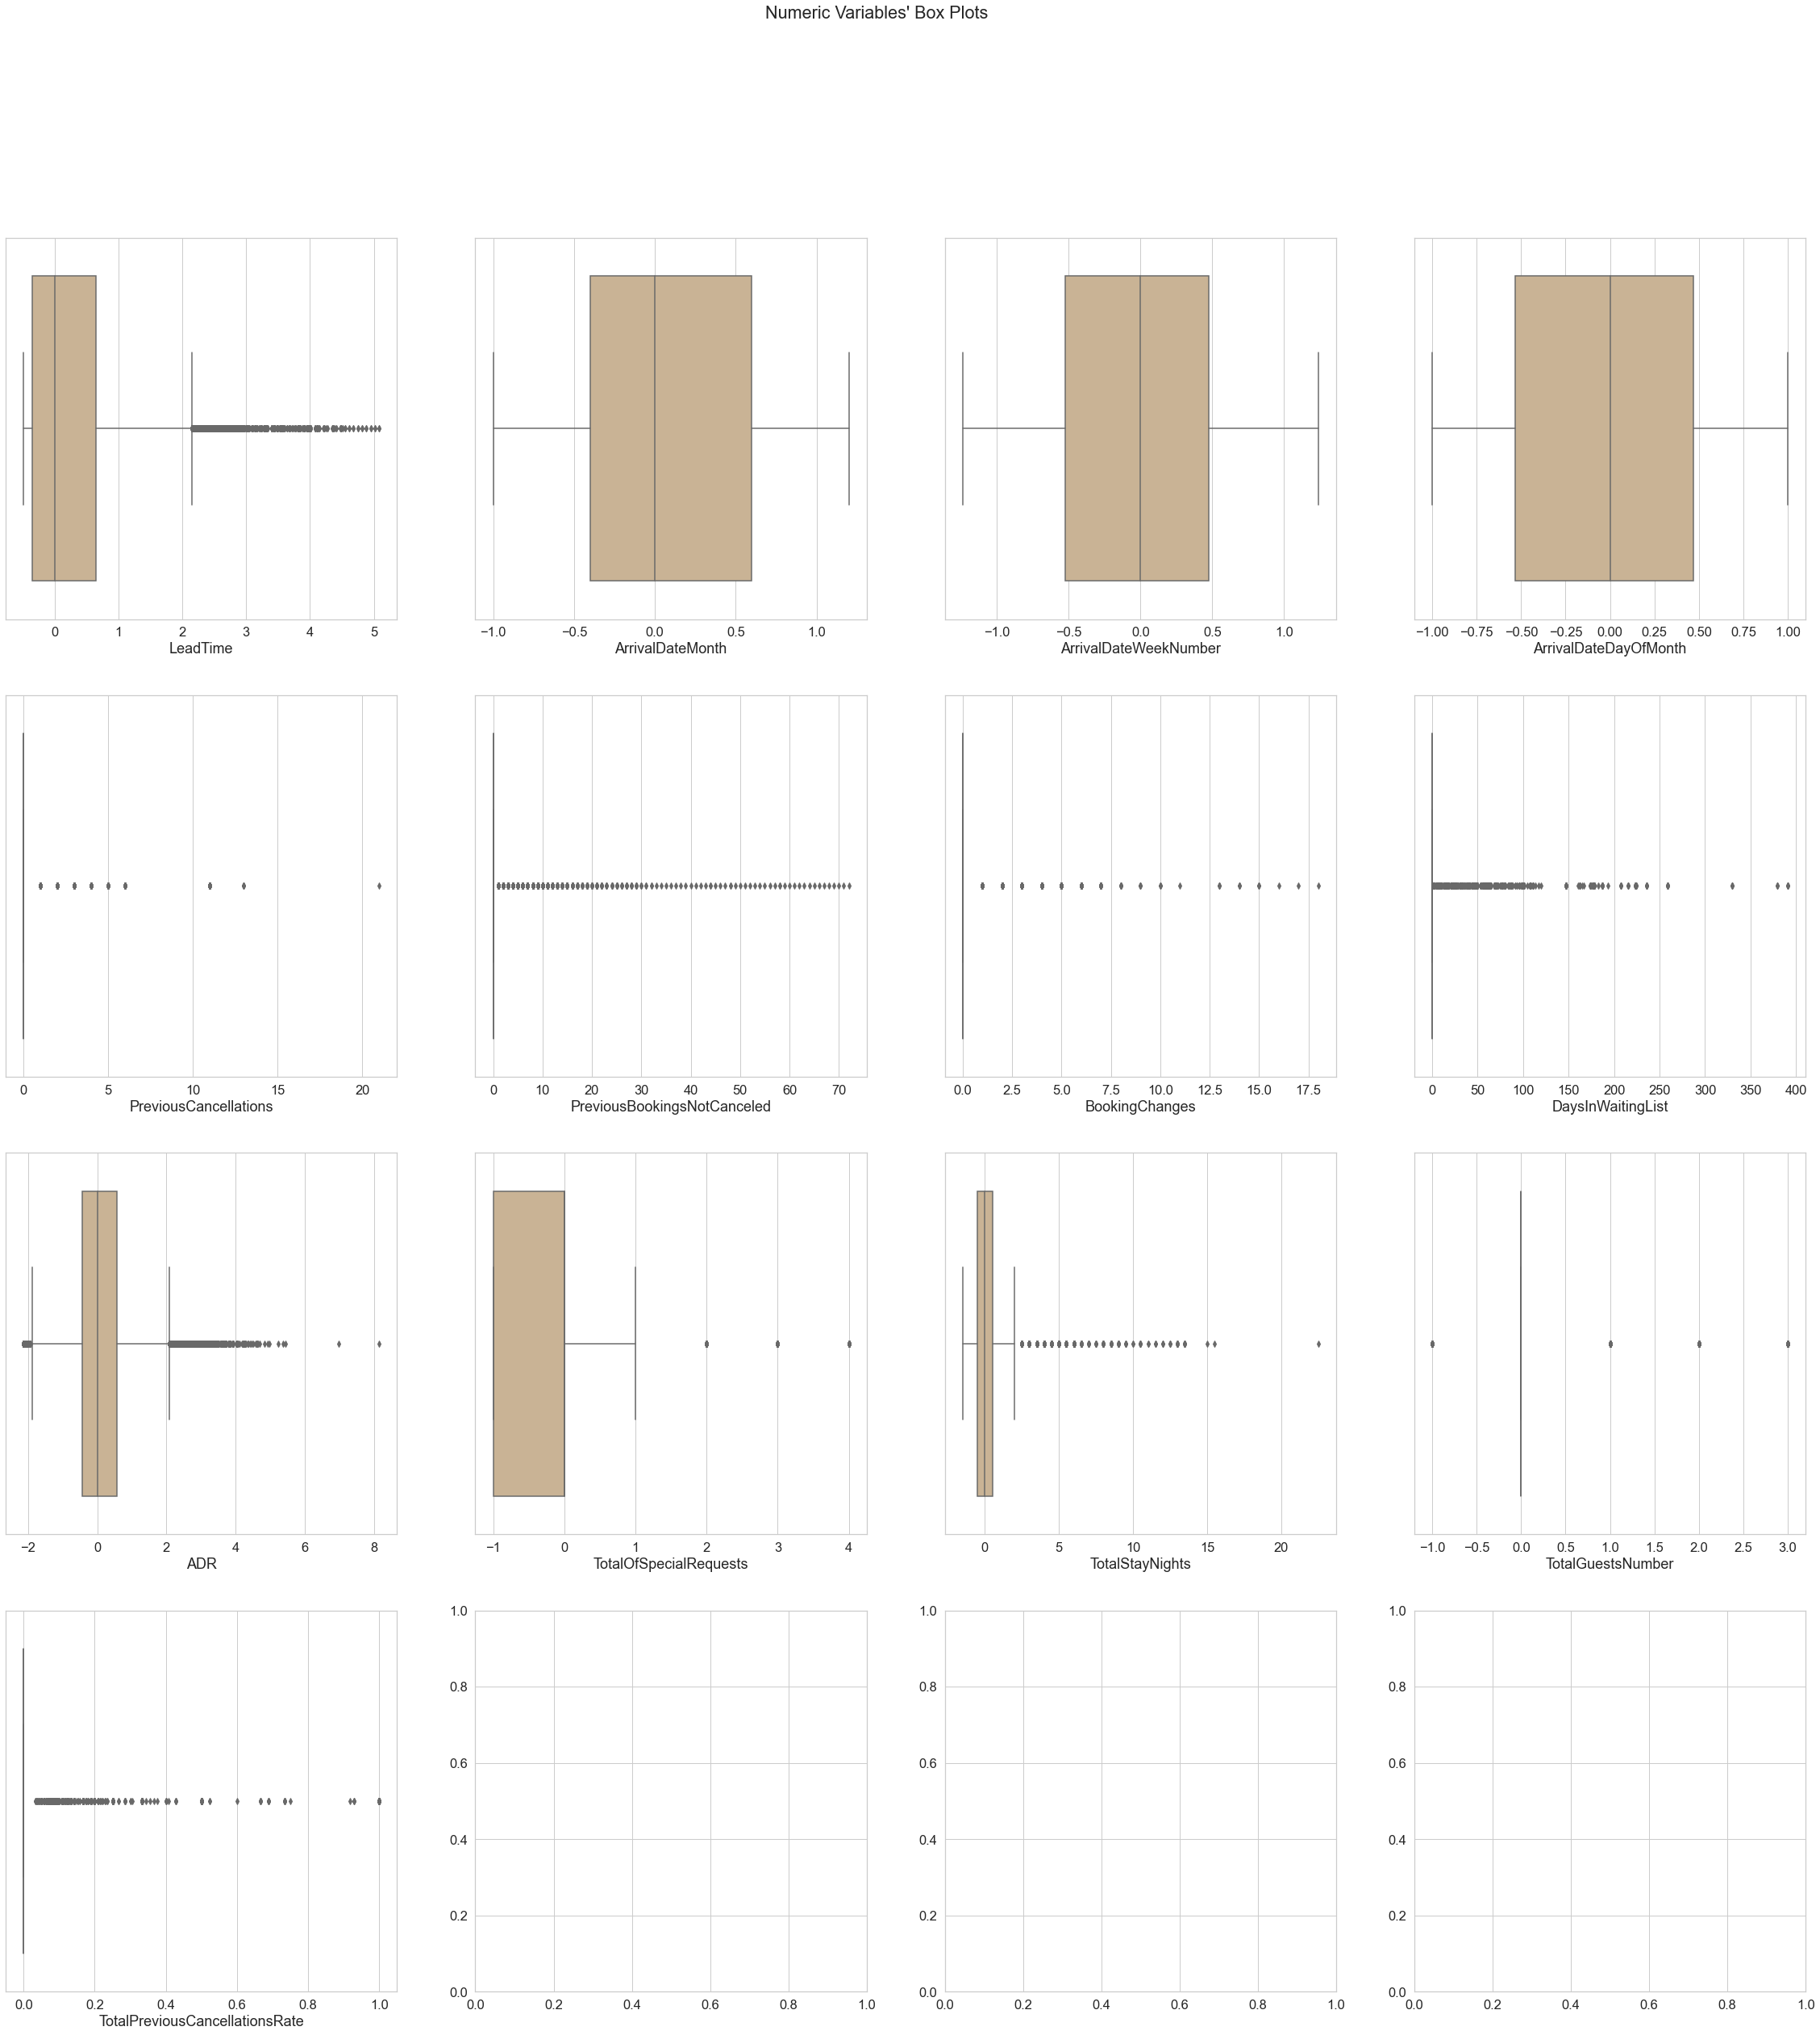

In [65]:
# check the boxplots of metric features
sns.set()
sns.set_theme(style = "whitegrid", font_scale = 1.5)

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(40, 40))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=dfn[feat], ax=ax, color='tan')
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

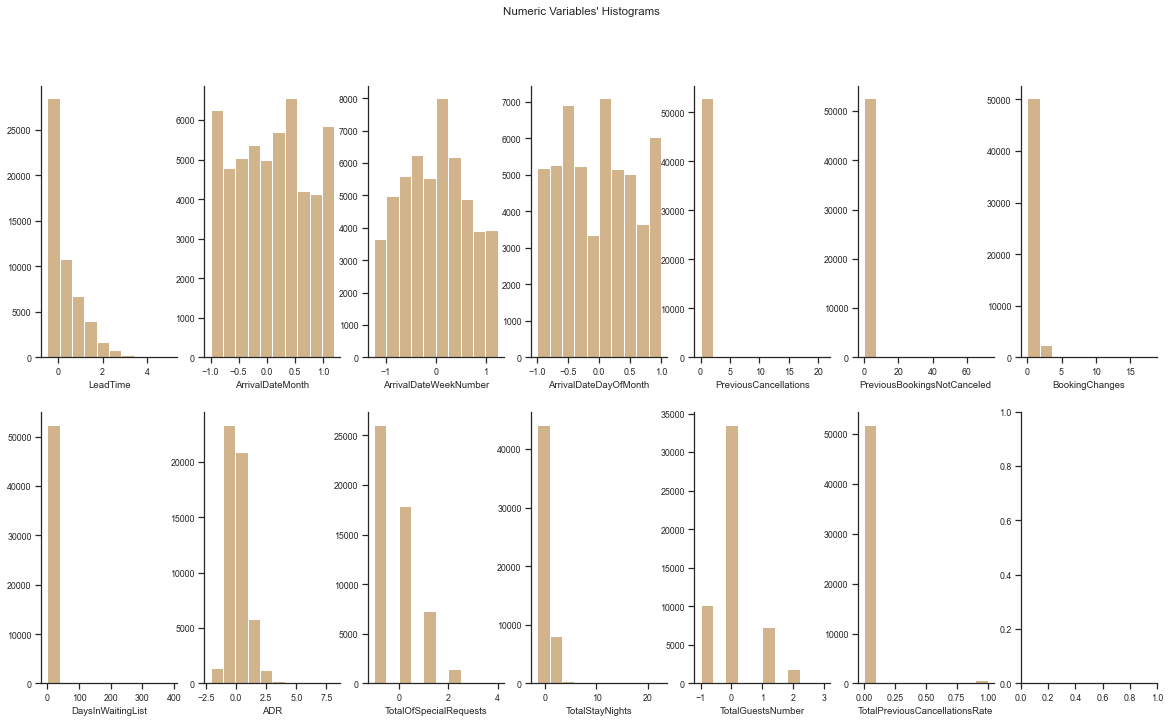

In [66]:
# combine all numerical variables in one figure
sns.set()
sns.set_theme(style = "ticks", rc=custom_params, font_scale = 0.8)

# create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(dfn[feat], color = 'tan')
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

Text(0.5, 0.98, "Categorical/Low Cardinality Variables' Absolute Frequencies")

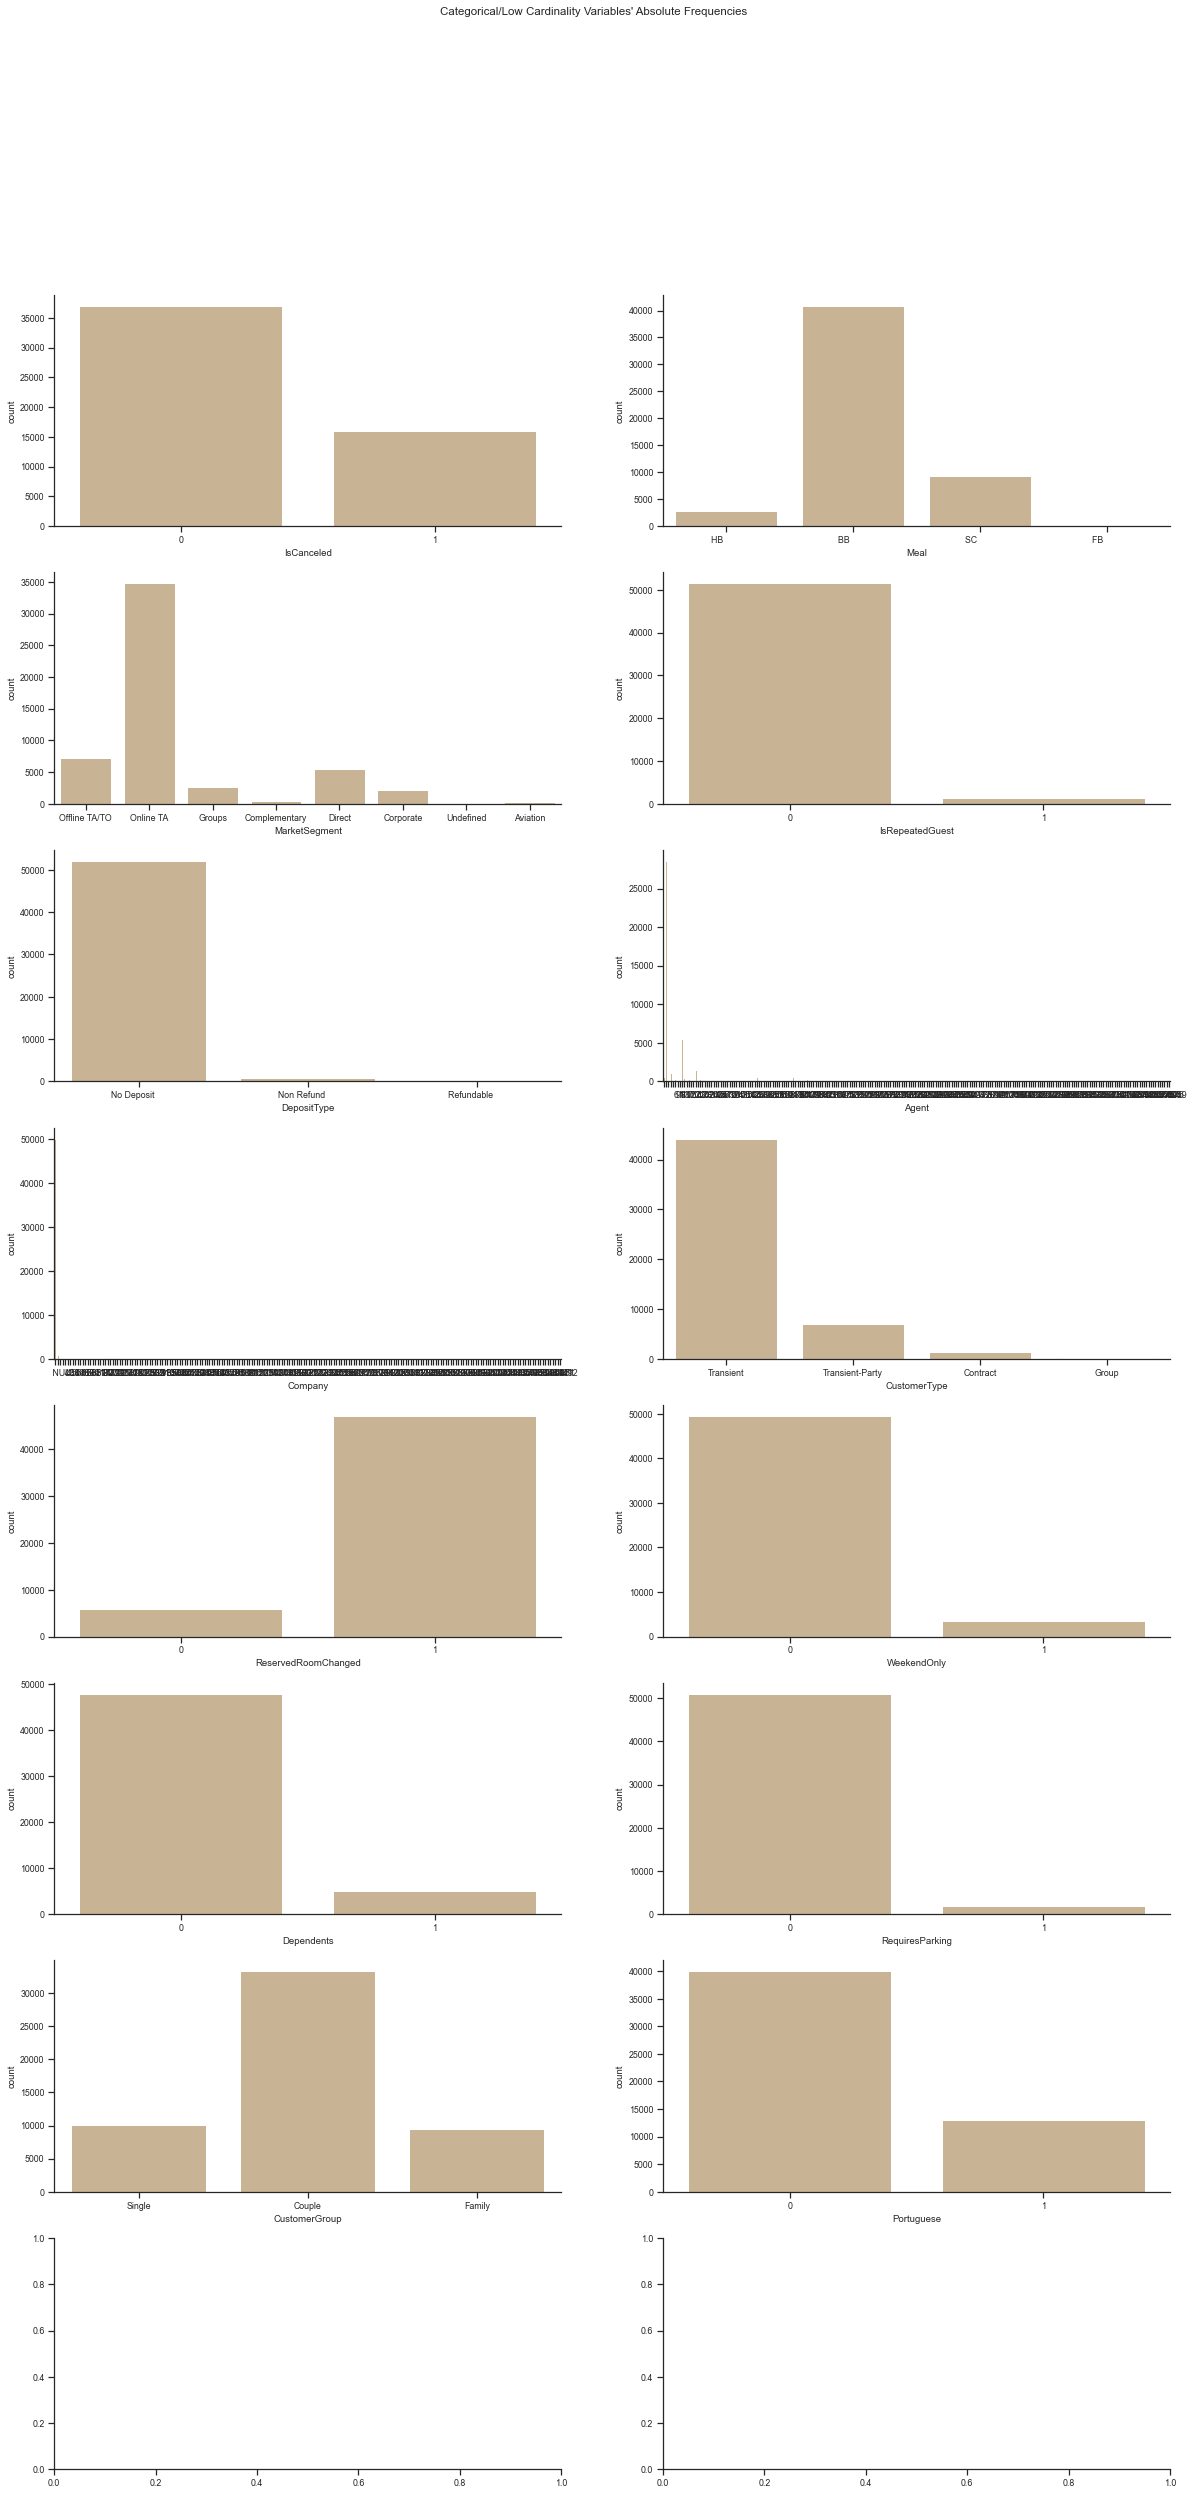

In [67]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()
sns.set_theme(style = "ticks", rc=custom_params, font_scale = 0.8)
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(8, ceil(len(non_metric_features) / 9), figsize=(20, 40))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(df_clean[feat].astype(object), ax=ax, color='tan')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

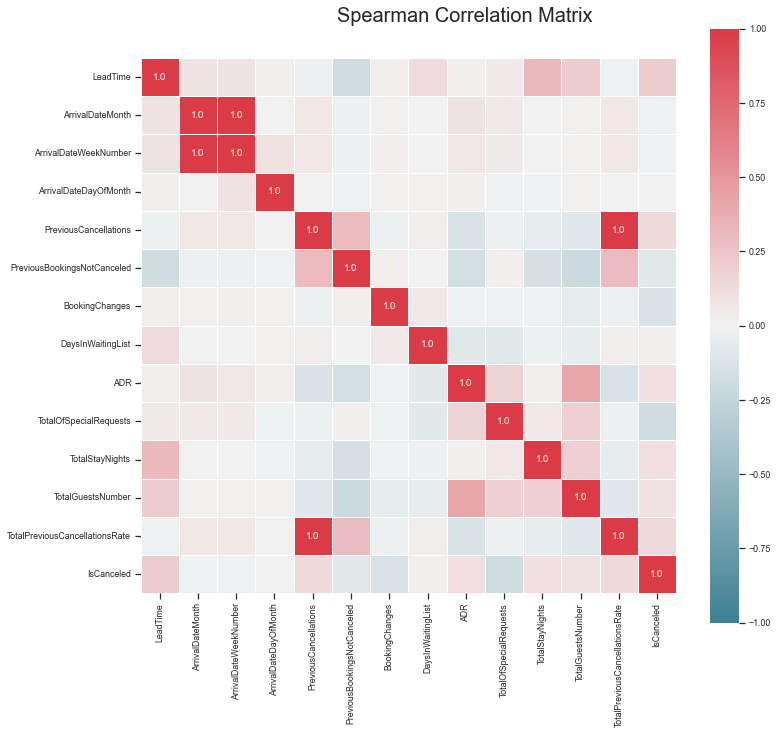

In [68]:
# Prepare figure
fig = plt.figure(figsize=(12, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(dfn[metric_features+['IsCanceled']].corr(method='spearman'), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix", fontsize=20)

plt.show()

In [69]:
# check the correlarion rate between mertric features and our target
dfn[metric_features].apply(lambda x: x.corr(df.IsCanceled,method='spearman'))

LeadTime                          0.214811
ArrivalDateMonth                 -0.008700
ArrivalDateWeekNumber            -0.010681
ArrivalDateDayOfMonth             0.003304
PreviousCancellations             0.126146
PreviousBookingsNotCanceled      -0.087838
BookingChanges                   -0.126866
DaysInWaitingList                 0.022245
ADR                               0.097335
TotalOfSpecialRequests           -0.176840
TotalStayNights                   0.095975
TotalGuestsNumber                 0.087213
TotalPreviousCancellationsRate    0.128264
dtype: float64

In [70]:
# drop the variable ArrivalDateMonth
dfn=dfn.drop(columns=['ArrivalDateMonth'])

## encode the categorical features

In [71]:
df_encode=dfn.copy()

#Define metric and non-metric features. 
categorical = df_encode[non_metric_features].columns.drop('IsCanceled').to_list()

# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_encode[categorical])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_encode.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_encode = pd.concat([df_encode.drop(columns=categorical), ohc_df], axis=1)
df_encode.head()

LeadTime  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  \
0 -0.432692                    0.0              -1.000000   
1  0.355769                    0.0              -1.000000   
2  0.134615                    0.0              -1.000000   
3  0.394231                    0.0              -1.000000   
4  0.471154                    0.0              -0.933333   

   PreviousCancellations  PreviousBookingsNotCanceled  BookingChanges  \
0                    0.0                          0.0             0.0   
1                    0.0                          0.0             0.0   
2                    0.0                          0.0             0.0   
3                    0.0                          0.0             0.0   
4                    0.0                          0.0             0.0   

   DaysInWaitingList       ADR  TotalOfSpecialRequests  TotalStayNights  \
0                0.0 -2.130737                    -1.0             -0.5   
1                0.0 -0.587310                     0.0              0.5   
2                0.0 -0.758802                     0.0              0.5   
3                0.0 -0.587310                     1.0              1.5   
4                0.0 -0.587310                     0.0             -0.5   

   TotalGuestsNumber  TotalPreviousCancellationsRate  IsCanceled  \
0               -1.0                             0.0           0   
1                0.0                             0.0           1   
2               -1.0                             0.0           1   
3                0.0                             0.0           1   
4                0.0                             0.0           1   

   x0_FB         x0_HB         x0_SC         x1_Complementary  x1_Corporate  \
0           0.0           1.0           0.0               0.0           0.0   
1           0.0           0.0           0.0               0.0           0.0   
2           0.0           0.0           0.0               0.0           0.0   
3           0.0           0.0           0.0               0.0           0.0   
4           0.0           0.0           0.0               0.0           0.0   

   x1_Direct  x1_Groups  x1_Offline TA/TO  x1_Online TA  x1_Undefined  x2_1  \
0        0.0        0.0               1.0           0.0           0.0   0.0   
1        0.0        0.0               0.0           1.0           0.0   0.0   
2        0.0        0.0               0.0           1.0           0.0   0.0   
3        0.0        0.0               0.0           1.0           0.0   0.0   
4        0.0        0.0               0.0           1.0           0.0   0.0   

   x3_Non Refund       x3_Refundable       x4_          2  x4_          3  \
0                 0.0                 0.0             0.0             0.0   
1                 0.0                 0.0             0.0             0.0   
2                 0.0                 0.0             0.0             0.0   
3                 0.0                 0.0             0.0             0.0   
4                 0.0                 0.0             0.0             0.0   

   x4_          4  x4_          5  x4_          6  x4_          7  \
0             0.0             0.0             1.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   x4_          8  x4_          9  x4_         10  x4_         11  \
0             0.0             0.0             0.0             0.0   
1             0.0             1.0             0.0             0.0   
2             0.0             1.0             0.0             0.0   
3             0.0             1.0             0.0             0.0   
4             0.0             1.0             0.0             0.0   

   x4_         12  x4_         13  x4_         14  x4_         15  \
0             0.0        

# Modeling

because our data is ordered with time series, we are going to reorder randomly hte data to avoid the influence of the time.

In [72]:
# shuffle the DataFrame rows
df_encode = df_encode.sample(frac = 1)

Divide the data into training, testing 

In [73]:
X=df_encode.drop(columns=['IsCanceled'])
y=df_encode['IsCanceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

### Model selection

#### Cross-validation: evaluating estimator performance

In [74]:
def CV_scores(model,cv=10,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    scores_mode=['balanced_accuracy','f1']
    scores_results={}
    for i in scores_mode:
        scores_results[i] = round(cross_val_score(model, X_train, y_train.ravel(),cv=cv, scoring = i).mean(),4)
    return scores_results
    

In [75]:
models=[GaussianNB(),
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier()]

In [76]:
%%time
models_scores={}
models_scores[str(models[0])] = CV_scores(models[0])
models_scores

Wall time: 8.83 s


{'GaussianNB()': {'balanced_accuracy': 0.5485, 'f1': 0.486}}

In [77]:
%%time
models_scores[str(models[1])] = CV_scores(models[1])
models_scores

Wall time: 49.2 s


{'GaussianNB()': {'balanced_accuracy': 0.5485, 'f1': 0.486},
 'LogisticRegression()': {'balanced_accuracy': 0.7102, 'f1': 0.5937}}

In [78]:
%%time
models_scores[str(models[2])] = CV_scores(models[2])
models_scores

Wall time: 17.8 s


{'GaussianNB()': {'balanced_accuracy': 0.5485, 'f1': 0.486},
 'LogisticRegression()': {'balanced_accuracy': 0.7102, 'f1': 0.5937},
 'DecisionTreeClassifier()': {'balanced_accuracy': 0.726, 'f1': 0.6147}}

In [79]:
%%time
models_scores[str(models[3])] = CV_scores(models[3])
models_scores

Wall time: 4min 18s


{'GaussianNB()': {'balanced_accuracy': 0.5485, 'f1': 0.486},
 'LogisticRegression()': {'balanced_accuracy': 0.7102, 'f1': 0.5937},
 'DecisionTreeClassifier()': {'balanced_accuracy': 0.726, 'f1': 0.6147},
 'RandomForestClassifier()': {'balanced_accuracy': 0.7591, 'f1': 0.6713}}

In [80]:
%%time
models_scores[str(models[4])] = CV_scores(models[4])
models_scores

Wall time: 8min 5s


{'GaussianNB()': {'balanced_accuracy': 0.5485, 'f1': 0.486},
 'LogisticRegression()': {'balanced_accuracy': 0.7102, 'f1': 0.5937},
 'DecisionTreeClassifier()': {'balanced_accuracy': 0.726, 'f1': 0.6147},
 'RandomForestClassifier()': {'balanced_accuracy': 0.7591, 'f1': 0.6713},
 'GradientBoostingClassifier()': {'balanced_accuracy': 0.7505, 'f1': 0.6569}}

In [81]:
%%time
models_scores[str(models[5])] = CV_scores(models[5])
models_scores

Wall time: 2min 57s


{'GaussianNB()': {'balanced_accuracy': 0.5485, 'f1': 0.486},
 'LogisticRegression()': {'balanced_accuracy': 0.7102, 'f1': 0.5937},
 'DecisionTreeClassifier()': {'balanced_accuracy': 0.726, 'f1': 0.6147},
 'RandomForestClassifier()': {'balanced_accuracy': 0.7591, 'f1': 0.6713},
 'GradientBoostingClassifier()': {'balanced_accuracy': 0.7505, 'f1': 0.6569},
 'AdaBoostClassifier()': {'balanced_accuracy': 0.7298, 'f1': 0.6243}}

In [82]:
models_scores=pd.DataFrame(models_scores).transpose().rename_axis('models').reset_index()
models_scores

models  balanced_accuracy      f1
0                  GaussianNB()             0.5485  0.4860
1          LogisticRegression()             0.7102  0.5937
2      DecisionTreeClassifier()             0.7260  0.6147
3      RandomForestClassifier()             0.7591  0.6713
4  GradientBoostingClassifier()             0.7505  0.6569
5          AdaBoostClassifier()             0.7298  0.6243

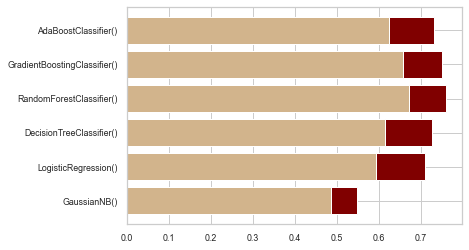

In [83]:
sns.set_style("whitegrid")
plt.barh(models_scores.models, models_scores.balanced_accuracy, color='maroon')
plt.barh(models_scores.models, models_scores.f1, color='tan')
plt.show()

### Feature selection

In [84]:
sns.set_style("whitegrid")
X=df_encode.drop(columns=['IsCanceled'])
y=df_encode['IsCanceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
feature_importances = RandomForestClassifier().fit(X_train, y_train).feature_importances_
zippy = pd.DataFrame(zip(feature_importances), columns = ['importance'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)
plt.figure(figsize=(150,150))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

<AxesSubplot:xlabel='Value', ylabel='Col'>

select the features with importance score higher than 1%

Text(0, 0.5, 'Features')

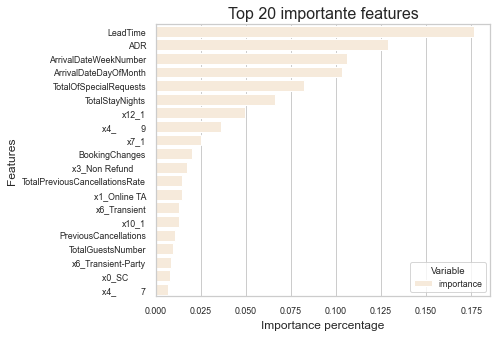

In [98]:
important_feature=zippy.nlargest(18,'importance').col.to_list()
plt.figure(figsize=(6,5)) 
plt.title("Top 20 importante features", fontsize = 16)
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy[:20],palette=['antiquewhite', 'tan'])
plt.xlabel("Importance percentage", fontsize = 12, labelpad = 5)
plt.ylabel("Features", fontsize = 12, labelpad = 5)

## Tuning the hyper-parameters of an estimator

In [86]:
X=df_encode[important_feature]
y=df_encode['IsCanceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [87]:
clf = RandomForestClassifier()

scores = cross_val_score(clf, X_train, y_train.ravel(),
                         cv=5, scoring = 'f1')
print ("mean validation F1 for Decision Tree Classifier:",
       "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
clf = clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
f1 = f1_score(y_test,y_pred)
print ('Test F1 for RandomForest Classifier :', f1)

mean validation F1 for Decision Tree Classifier: 0.68 (+/- 0.02)
Test F1 for RandomForest Classifier : 0.6720241084881968


In [88]:
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(X,y)
print(rf0.oob_score_)
y_predprob = rf0.predict_proba(X)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

0.8212443554329548
AUC Score (Train): 0.999883


The output which shows that the out-of-bag score is already high and the AUC score is also very high.  the default parameter fit of RF is better for this example.

In [89]:
param_test1 = {'n_estimators':range(50,151,10)}
clf = GridSearchCV(estimator = RandomForestClassifier(random_state=10), 
                       param_grid = param_test1, scoring='f1',cv=5)
clf.fit(X_train,y_train)
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'n_estimators': 130}
------------------------------------------------------------------------------------------------------------------------
0.677 (+/-0.009) for {'n_estimators': 50}
0.677 (+/-0.008) for {'n_estimators': 60}
0.678 (+/-0.010) for {'n_estimators': 70}
0.679 (+/-0.011) for {'n_estimators': 80}
0.680 (+/-0.010) for {'n_estimators': 90}
0.681 (+/-0.011) for {'n_estimators': 100}
0.681 (+/-0.011) for {'n_estimators': 110}
0.681 (+/-0.011) for {'n_estimators': 120}
0.682 (+/-0.012) for {'n_estimators': 130}
0.681 (+/-0.011) for {'n_estimators': 140}
0.681 (+/-0.011) for {'n_estimators': 150}


Then we perform a grid search for the maximum depth max_depth of the decision tree and the minimum number of samples min_samples_split required to subdivide the internal nodes.

In [90]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
clf = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 130, 
                                  max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='f1', cv=5)
clf.fit(X_train,y_train)
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'max_depth': 13, 'min_samples_split': 50}
------------------------------------------------------------------------------------------------------------------------
0.153 (+/-0.007) for {'max_depth': 3, 'min_samples_split': 50}
0.153 (+/-0.007) for {'max_depth': 3, 'min_samples_split': 70}
0.153 (+/-0.007) for {'max_depth': 3, 'min_samples_split': 90}
0.153 (+/-0.007) for {'max_depth': 3, 'min_samples_split': 110}
0.153 (+/-0.007) for {'max_depth': 3, 'min_samples_split': 130}
0.153 (+/-0.007) for {'max_depth': 3, 'min_samples_split': 150}
0.153 (+/-0.007) for {'max_depth': 3, 'min_samples_split': 170}
0.153 (+/-0.007) for {'max_depth': 3, 'min_samples_split': 190}
0.578 (+/-0.008) for {'max_depth': 5, 'min_samples_split': 50}
0.579 (+/-0.009) for {'max_depth': 5, 'min_samples_split': 70}
0.578 (+/-0.009) for {'max_depth': 5, 'min_samples_split

The minimum number of samples required for internal node repartitioning, min_samples_split, cannot be determined together for the time being, because it is also related to other parameters of the decision tree. In the following, we will refer to min_samples_split and min_samples_leaf for the minimum number of samples required for internal node repartitioning.

In [91]:
param_test3 = {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(10,60,10)}
clf = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 130, max_depth=13,
                                  min_samples_split=50 ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='f1', cv=5)
clf.fit(X_train,y_train)
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'min_samples_leaf': 10, 'min_samples_split': 100}
------------------------------------------------------------------------------------------------------------------------
0.648 (+/-0.010) for {'min_samples_leaf': 10, 'min_samples_split': 80}
0.649 (+/-0.009) for {'min_samples_leaf': 10, 'min_samples_split': 100}
0.649 (+/-0.009) for {'min_samples_leaf': 10, 'min_samples_split': 120}
0.648 (+/-0.010) for {'min_samples_leaf': 10, 'min_samples_split': 140}
0.648 (+/-0.009) for {'min_samples_leaf': 20, 'min_samples_split': 80}
0.647 (+/-0.010) for {'min_samples_leaf': 20, 'min_samples_split': 100}
0.646 (+/-0.010) for {'min_samples_leaf': 20, 'min_samples_split': 120}
0.645 (+/-0.010) for {'min_samples_leaf': 20, 'min_samples_split': 140}
0.644 (+/-0.009) for {'min_samples_leaf': 30, 'min_samples_split': 80}
0.645 (+/-0.009) for {'min_samples_lea

Finally, we do the tuning for the maximum number of features max_features:

In [92]:
param_test4 = {'max_features':range(3,11,2)}
clf = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 130, max_depth=13, min_samples_split=80,
                                  min_samples_leaf=10 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='f1', cv=5)
clf.fit(X_train,y_train)
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'max_features': 9}
------------------------------------------------------------------------------------------------------------------------
0.633 (+/-0.009) for {'max_features': 3}
0.659 (+/-0.011) for {'max_features': 5}
0.663 (+/-0.010) for {'max_features': 7}
0.664 (+/-0.010) for {'max_features': 9}


# Evaluation

Using the best parameters we searched for, we then look at the final model fit

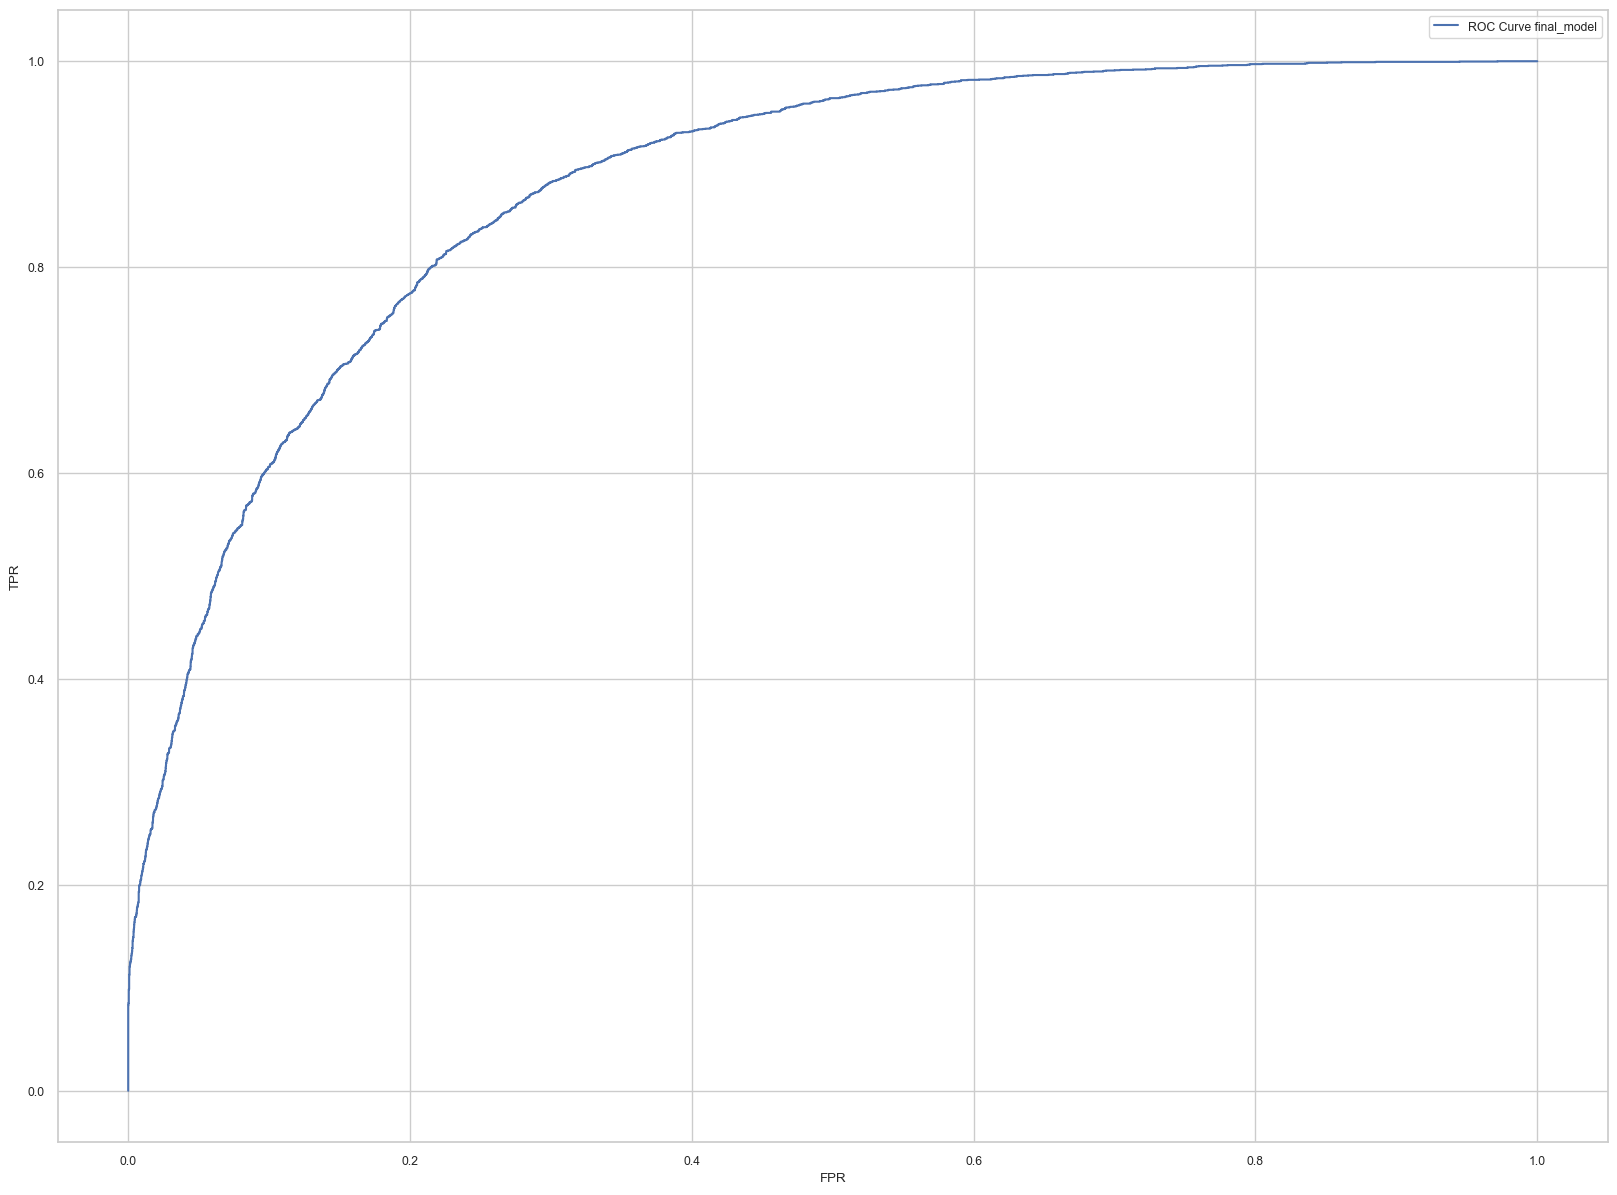

In [93]:
final_model = RandomForestClassifier(n_estimators= 130, max_depth=13, min_samples_split=80,
                                  min_samples_leaf=10 ,max_features=9,oob_score=True, random_state=10).fit(X_train, y_train)

prob_final_model= final_model.predict_proba(X_test)

fpr_final_model, tpr_final_model, thresholds_final_model = roc_curve(y_test, prob_final_model[:,1])

plt.figure(figsize=(20, 15), dpi=100)

plt.plot(fpr_final_model, tpr_final_model,label="ROC Curve final_model")

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

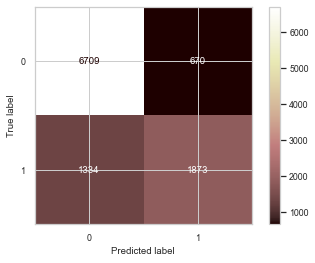

In [94]:
final_model.fit(X_train, y_train)
plot_confusion_matrix(final_model, X_test, y_test,cmap='pink')  
plt.show()

In [95]:
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
final_accuracy_score=accuracy_score(y_test, y_pred)
final_balanced_accuracy_score=balanced_accuracy_score(y_test, y_pred)
final_precision_score=precision_score(y_test, y_pred)
final_recall_score=recall_score(y_test, y_pred)
final_f1_score=f1_score(y_test, y_pred)

print(
    'accuracy_score :', final_accuracy_score,"\n",
    'balanced_accuracy_score :', final_balanced_accuracy_score,"\n",
    'precision_score :', final_precision_score,"\n",
    'recall_score :', final_recall_score,"\n",
    'f1_score :',final_f1_score)


accuracy_score : 0.8106933686000378 
 balanced_accuracy_score : 0.7466183562324471 
 precision_score : 0.7365316555249705 
 recall_score : 0.584034923604615 
 f1_score : 0.6514782608695652


In [96]:
Cancelation_Rate= round(pd.DataFrame(final_model.predict_proba(X_test)),2)
Cancelation_Rate

0     1
0      0.68  0.32
1      0.53  0.47
2      0.89  0.11
3      1.00  0.00
4      0.62  0.38
...     ...   ...
10581  0.37  0.63
10582  0.56  0.44
10583  0.67  0.33
10584  0.70  0.30
10585  0.24  0.76

[10586 rows x 2 columns]